---
## Fase 1: Analisi Esplorativa dei Dati

Prima di costruire qualsiasi modello, dobbiamo **conoscere i nostri dati**. È come studiare il terreno prima di costruire una casa: dobbiamo capire cosa abbiamo tra le mani.

### La Regola dell'Esame
Come visto nelle slides, non possiamo valutare un modello sui dati su cui è stato addestrato. Divideremo quindi il dataset in:
- **Training Set (80%)**: Per addestrare i modelli
- **Test Set (20%)**: Per la valutazione finale ("l'esame")

La 5-fold cross-validation verrà applicata solo sul training set per scegliere il modello migliore.

In [1]:
# Import delle librerie fondamentali
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Per grafici più belli (opzionale)
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

print("Librerie importate con successo!")

Librerie importate con successo!


### 1.1 Caricamento del Dataset

Il California Housing Dataset è fornito direttamente da scikit-learn. Contiene informazioni su **20,640 distretti** della California.

In [2]:
# Caricare il dataset
california = fetch_california_housing()

# Informazioni sul dataset
print("Descrizione del Dataset:")
print("=" * 80)
print(california.DESCR)

Descrizione del Dataset:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. cen

### 1.2 Creazione del DataFrame

Convertiamo i dati in un **DataFrame Pandas** per facilitare l'analisi. Un DataFrame è come una tabella Excel in Python: ha righe, colonne e un'interfaccia potente per manipolare i dati.

In [3]:
# Creare DataFrame con le features
df = pd.DataFrame(california.data, columns=california.feature_names)

# Aggiungere la variabile target (prezzo)
df["MedHouseValue"] = california.target

# Visualizzare le prime righe
print("Prime 5 righe del dataset:")
print("=" * 80)
df.head()

Prime 5 righe del dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 1.3 Informazioni Generali

Usiamo `.info()` per ottenere una panoramica della struttura del dataset: numero di righe, colonne, tipi di dati e valori mancanti.

In [4]:
print("Informazioni sul Dataset:")
print("=" * 80)
df.info()

print("\nDimensioni del dataset:", df.shape)
print(f"Numero di righe: {df.shape[0]:,}")
print(f"Numero di colonne: {df.shape[1]}")

Informazioni sul Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Dimensioni del dataset: (20640, 9)
Numero di righe: 20,640
Numero di colonne: 9


**Osservazioni:**
- Abbiamo **8 features** (caratteristiche) + 1 target (MedHouseValue)
- Tutti i dati sono numerici (float64)
- Non ci sono valori mancanti (20640 entries per ogni colonna)
- Questo è un dataset "pulito", ideale per iniziare!

### 1.4 Statistiche Descrittive

Il metodo `.describe()` calcola statistiche di base per ogni colonna numerica: media, deviazione standard, minimo, massimo e percentili.

In [5]:
print("Statistiche Descrittive:")
print("=" * 80)
df.describe().round(2)

Statistiche Descrittive:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


**Cosa notiamo?**
- `MedInc` (reddito mediano) varia da 0.5 a 15 (in decine di migliaia di dollari)
- `HouseAge` (età della casa) va da 1 a 52 anni
- `AveRooms` ha un massimo di 141 (!) - possibile outlier
- `Population` ha grande variabilità (min=3, max=35682)
- Le features hanno **scale molto diverse** - potrebbe servire normalizzazione

### 1.5 Verifica Valori Mancanti

Anche se `.info()` ci ha mostrato che non ci sono `null`, verifichiamolo esplicitamente.

In [6]:
print("Valori Mancanti per Colonna:")
print("=" * 80)
missing = df.isna().sum()
print(missing)
print(f"\nTotale valori mancanti: {missing.sum()}")

Valori Mancanti per Colonna:
MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

Totale valori mancanti: 0


Perfetto! Nessun valore mancante. In un dataset reale, dovremmo decidere se:
- **Rimuovere** le righe incomplete (`dropna()`)
- **Imputare** valori (media, mediana, modello predittivo)
- Creare una **feature booleana** che indica la presenza di missing

### 1.6 Distribuzione della Variabile Target

Il nostro obiettivo è prevedere `MedHouseValue`. Vediamo come è distribuita questa variabile.

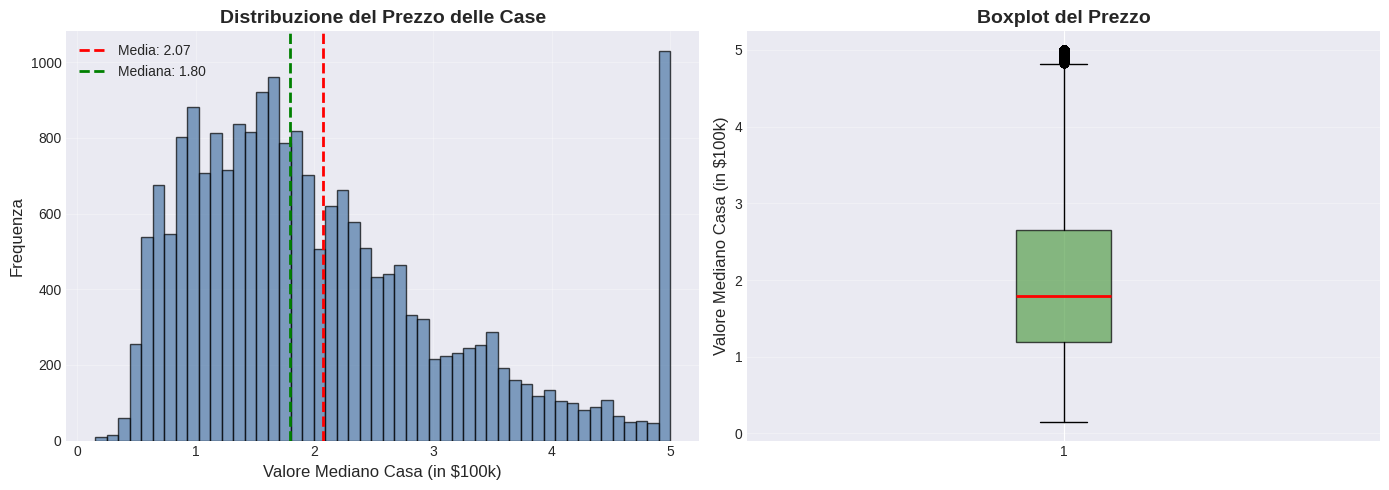

Media: $2.07 (×100k = $207k)
Mediana: $1.80 (×100k = $180k)
Deviazione Standard: $1.15
Range: [$0.15, $5.00]


In [145]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Istogramma
axes[0].hist(
    df["MedHouseValue"], bins=50, color="#4e79a7", edgecolor="black", alpha=0.7
)
axes[0].set_xlabel("Valore Mediano Casa (in $100k)", fontsize=12)
axes[0].set_ylabel("Frequenza", fontsize=12)
axes[0].set_title("Distribuzione del Prezzo delle Case", fontsize=14, fontweight="bold")
axes[0].axvline(
    df["MedHouseValue"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f'Media: {df["MedHouseValue"].mean():.2f}',
)
axes[0].axvline(
    df["MedHouseValue"].median(),
    color="green",
    linestyle="--",
    linewidth=2,
    label=f'Mediana: {df["MedHouseValue"].median():.2f}',
)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(
    df["MedHouseValue"],
    vert=True,
    patch_artist=True,
    boxprops=dict(facecolor="#59a14f", alpha=0.7),
    medianprops=dict(color="red", linewidth=2),
)
axes[1].set_ylabel("Valore Mediano Casa (in $100k)", fontsize=12)
axes[1].set_title("Boxplot del Prezzo", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

# Statistiche
print(
    f"Media: ${df['MedHouseValue'].mean():.2f} (×100k = ${df['MedHouseValue'].mean()*100:.0f}k)"
)
print(
    f"Mediana: ${df['MedHouseValue'].median():.2f} (×100k = ${df['MedHouseValue'].median()*100:.0f}k)"
)
print(f"Deviazione Standard: ${df['MedHouseValue'].std():.2f}")
print(f"Range: [${df['MedHouseValue'].min():.2f}, ${df['MedHouseValue'].max():.2f}]")

**Osservazioni:**
- La distribuzione è **asimmetrica positiva** (coda a destra)
- Valore massimo = 5.0 (sembra un cap artificiale - case sopra $500k troncate?)
- Media e mediana sono vicine ma non identiche
- Presenza di outliers sopra i $400k

### 1.7 Distribuzione delle Features

Visualizziamo tutte le features per capire le loro distribuzioni.

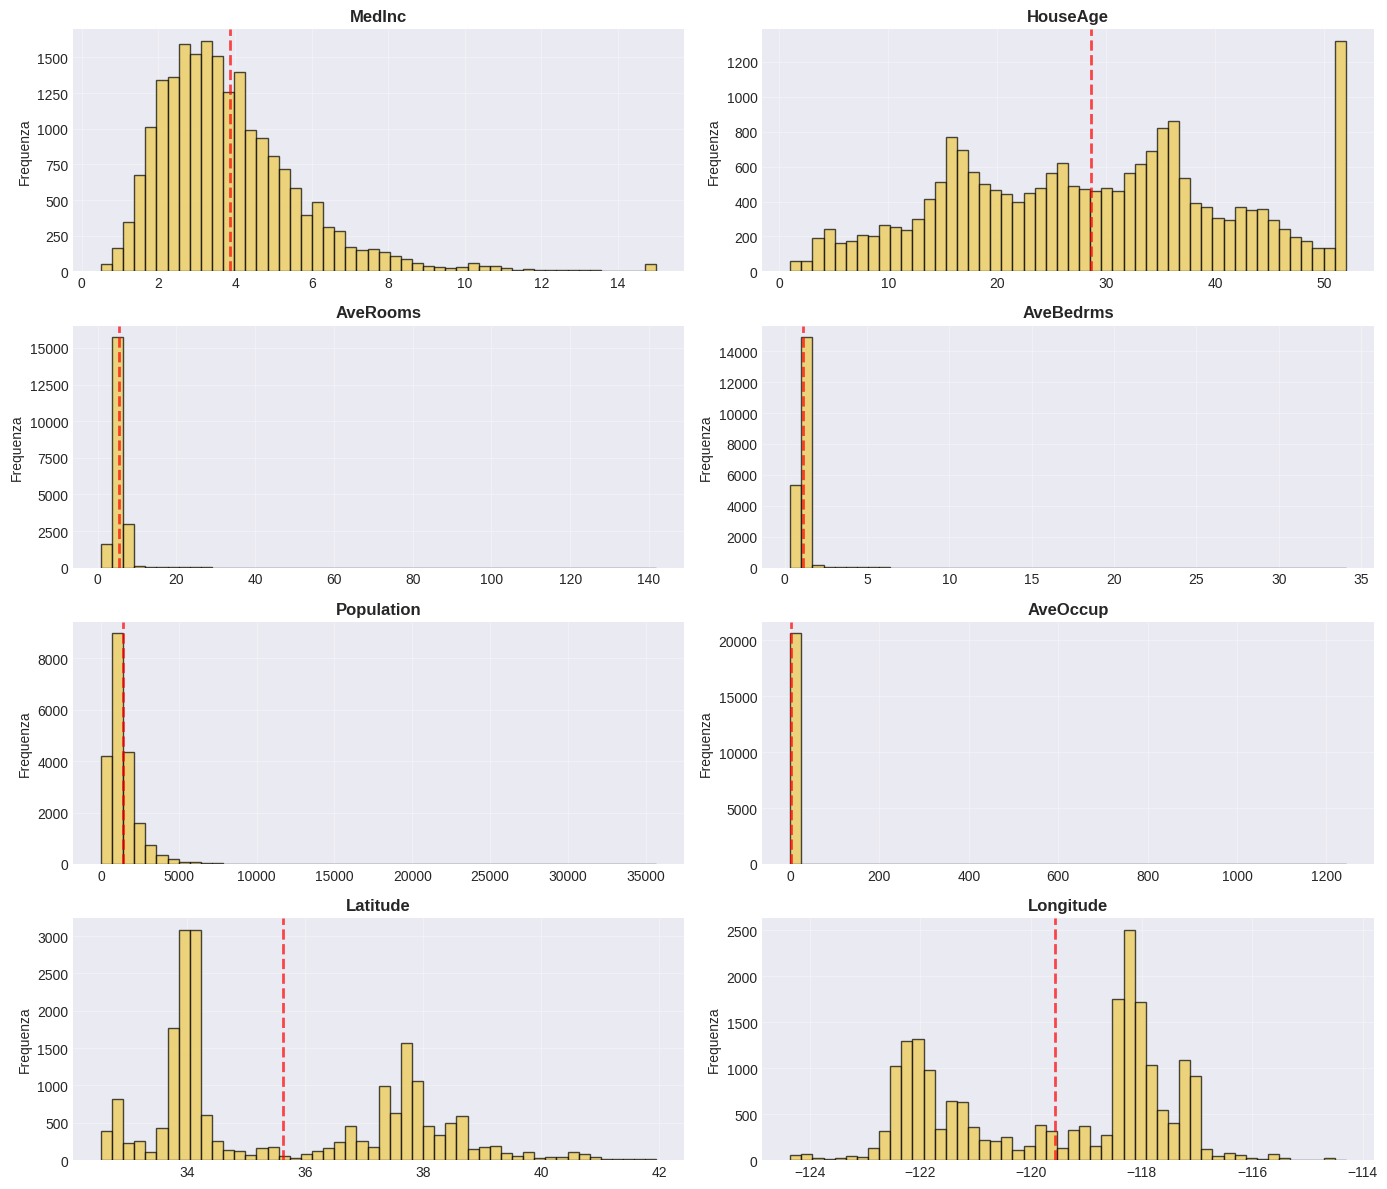

In [7]:
# Selezionare solo le features (escludere target)
features = california.feature_names

# Creare subplot 4x2
fig, axes = plt.subplots(4, 2, figsize=(14, 12))
axes = axes.ravel()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=50, color="#edc948", edgecolor="black", alpha=0.7)
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].set_ylabel("Frequenza")
    axes[i].grid(True, alpha=0.3)

    # Aggiungere media
    axes[i].axvline(df[col].mean(), color="red", linestyle="--", linewidth=2, alpha=0.7)

plt.tight_layout()
plt.show()

**Cosa impariamo?**
- **MedInc**: Distribuzione abbastanza normale, leggermente asimmetrica
- **HouseAge**: Picco a 52 anni (altro cap artificiale)
- **AveRooms, AveBedrms**: Fortemente asimmetriche con outliers estremi
- **Population**: Molto asimmetrica (pochi distretti molto popolosi)
- **AveOccup**: Distribuzione simile a Population
- **Latitude, Longitude**: Distribuzioni geografiche (vedremo dopo)

### 1.8 Matrice di Correlazione

La **correlazione** misura la relazione lineare tra due variabili. Valori vicini a +1/-1 indicano forte correlazione positiva/negativa.

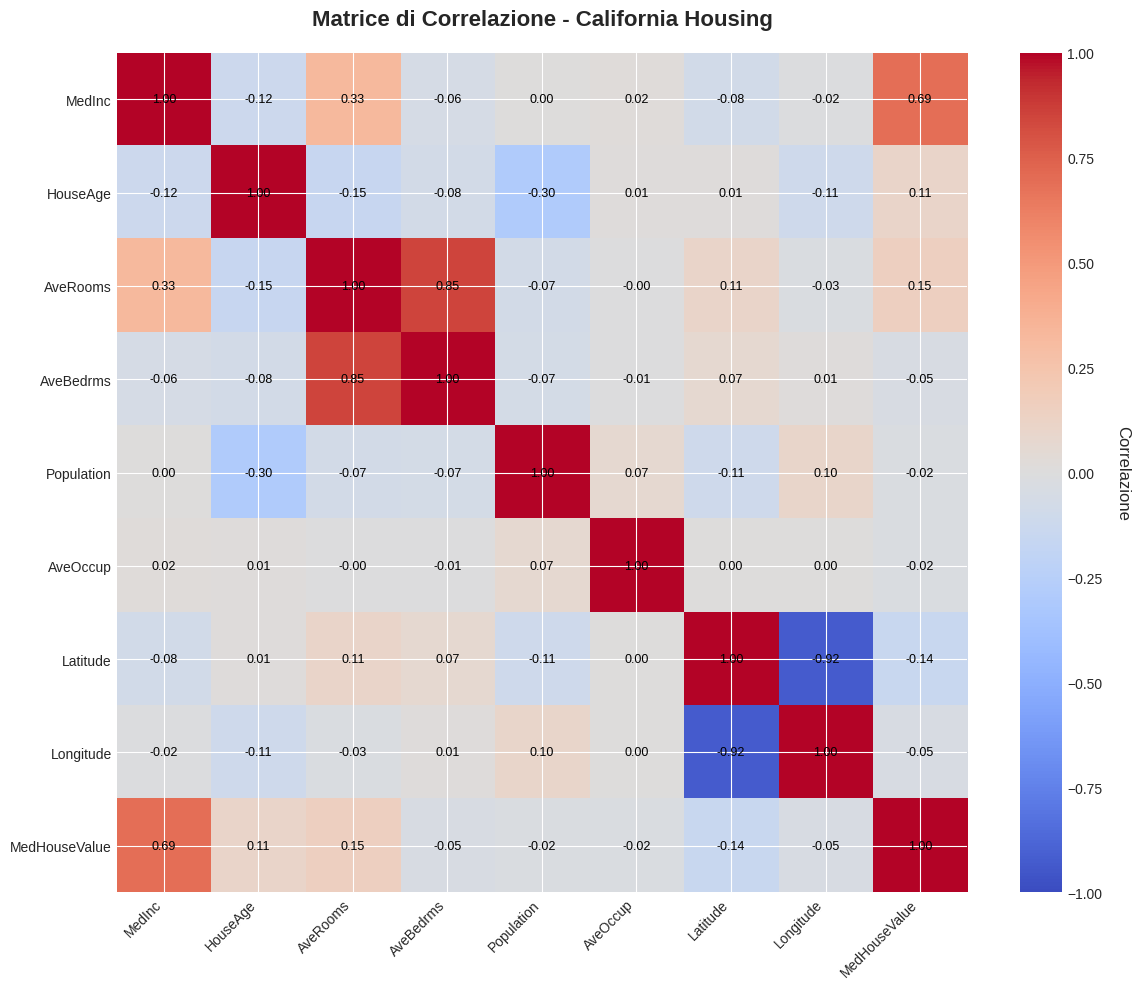

In [8]:
# Calcolare matrice di correlazione
corr_matrix = df.corr()

# Visualizzare con heatmap
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr_matrix, cmap="coolwarm", aspect="auto", vmin=-1, vmax=1)

# Aggiungere colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Correlazione", rotation=270, labelpad=20, fontsize=12)

# Etichette
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha="right")
ax.set_yticklabels(corr_matrix.columns)

# Aggiungere valori numerici
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(
            j,
            i,
            f"{corr_matrix.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=9,
        )

ax.set_title(
    "Matrice di Correlazione - California Housing",
    fontsize=16,
    fontweight="bold",
    pad=20,
)
plt.tight_layout()
plt.show()

**Correlazioni più importanti con il Target (MedHouseValue):**

Correlazione delle Features con MedHouseValue:
MedHouseValue    1.000000
MedInc           0.688075
AveRooms         0.151948
HouseAge         0.105623
AveOccup        -0.023737
Population      -0.024650
Longitude       -0.045967
AveBedrms       -0.046701
Latitude        -0.144160
Name: MedHouseValue, dtype: float64


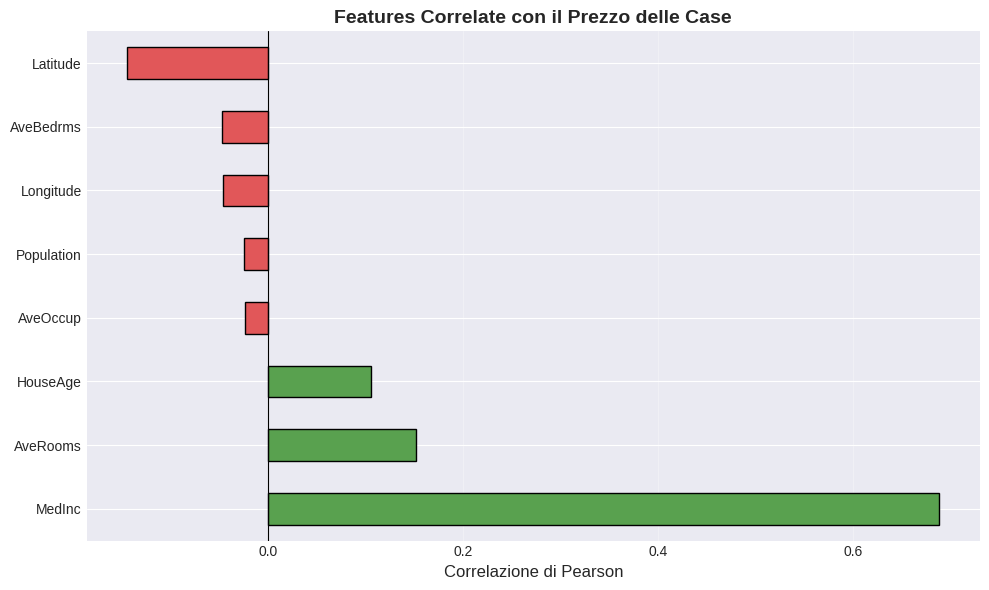

In [9]:
# Ordinare correlazioni con target
target_corr = corr_matrix["MedHouseValue"].sort_values(ascending=False)
print("Correlazione delle Features con MedHouseValue:")
print("=" * 60)
print(target_corr)

# Visualizzare con barplot
fig, ax = plt.subplots(figsize=(10, 6))
colors = [
    "#59a14f" if x > 0 else "#e15759" for x in target_corr[1:]
]  # Escludo correlazione con se stesso
target_corr[1:].plot(kind="barh", ax=ax, color=colors, edgecolor="black")
ax.set_xlabel("Correlazione di Pearson", fontsize=12)
ax.set_title(
    "Features Correlate con il Prezzo delle Case", fontsize=14, fontweight="bold"
)
ax.axvline(0, color="black", linewidth=0.8)
ax.grid(True, alpha=0.3, axis="x")
plt.tight_layout()
plt.show()

**Insights Chiave:**
1. **MedInc** (reddito mediano) ha la correlazione più forte (0.69) - il reddito è il miglior predittore!
2. **Latitude** ha correlazione negativa (-0.14) - case a nord tendono ad essere meno care
3. **Longitude** correlazione positiva (0.05) - debole effetto est-ovest
4. **HouseAge** quasi non correlato (0.11) - l'età conta poco
5. **AveRooms, AveBedrms** correlazione moderata positiva

### 1.9 Scatter Plots - Relazioni Bivariate

Visualizziamo graficamente la relazione tra le features più correlate e il target.

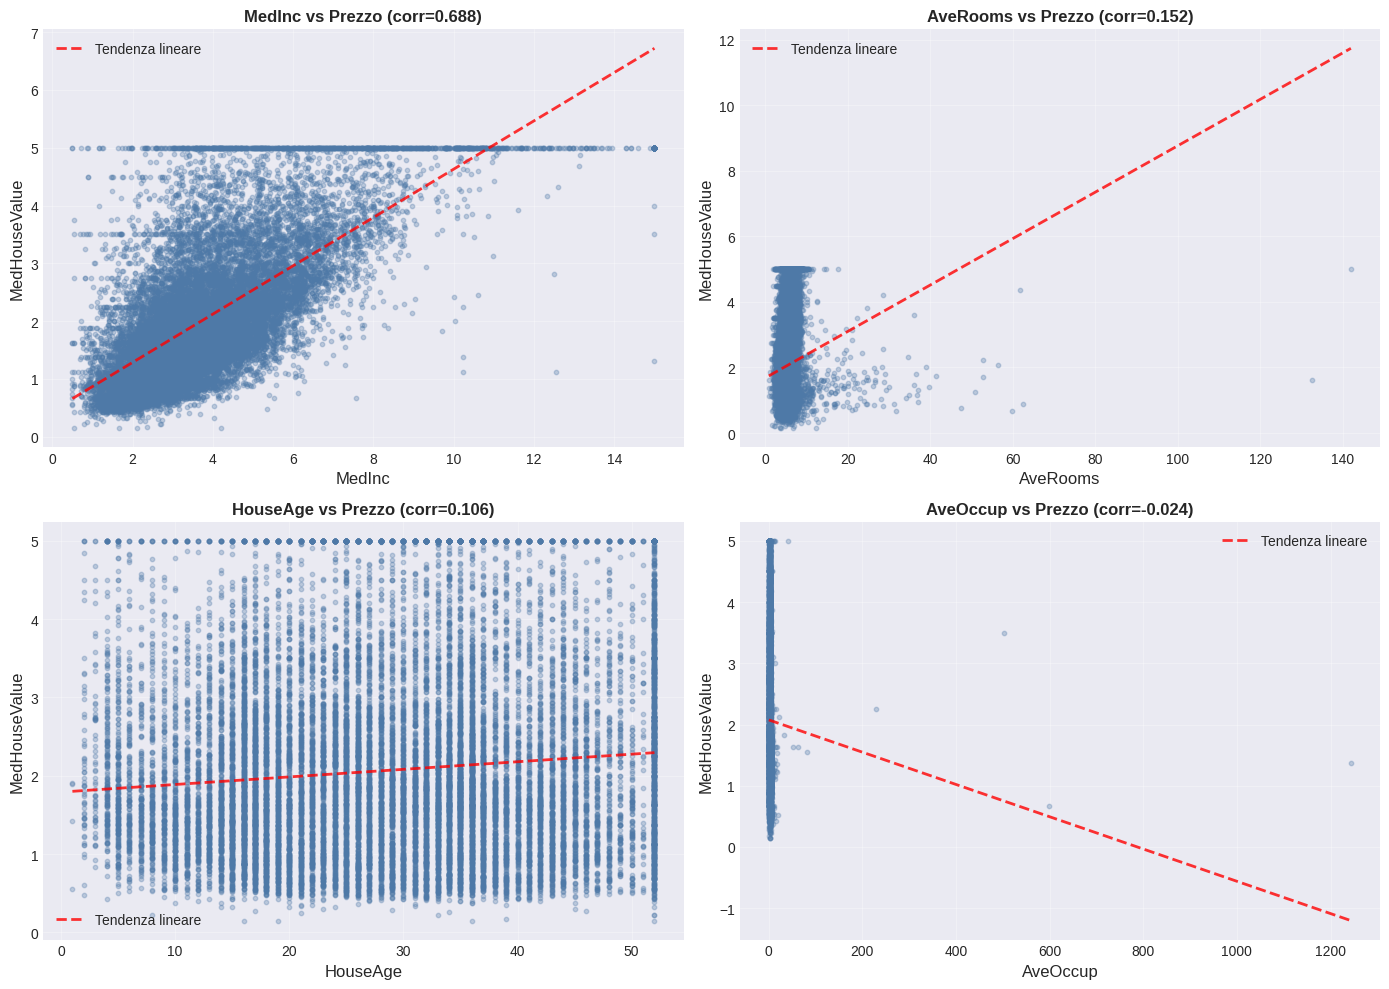

In [10]:
# Top 4 features correlate (escludendo se stesso)
top_features = target_corr[1:5].index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, feature in enumerate(top_features):
    # Scatter plot con trasparenza per gestire overlapping
    axes[i].scatter(df[feature], df["MedHouseValue"], alpha=0.3, s=10, color="#4e79a7")
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("MedHouseValue", fontsize=12)
    axes[i].set_title(
        f'{feature} vs Prezzo (corr={corr_matrix.loc[feature, "MedHouseValue"]:.3f})',
        fontsize=12,
        fontweight="bold",
    )
    axes[i].grid(True, alpha=0.3)

    # Aggiungere linea di tendenza
    z = np.polyfit(df[feature], df["MedHouseValue"], 1)
    p = np.poly1d(z)
    x_line = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[i].plot(
        x_line, p(x_line), "r--", linewidth=2, alpha=0.8, label="Tendenza lineare"
    )
    axes[i].legend()

plt.tight_layout()
plt.show()

**Osservazioni:**
- **MedInc**: Relazione quasi lineare e chiara! Ottimo per regressione lineare
- **AveRooms**: Relazione positiva ma con molti outliers (case con 20+ stanze)
- La linea a 5.0 nel prezzo è visibile - conferma del cap sui dati

### 1.10 Visualizzazione Geografica

California Housing ha coordinate geografiche! Creiamo una mappa dei prezzi.

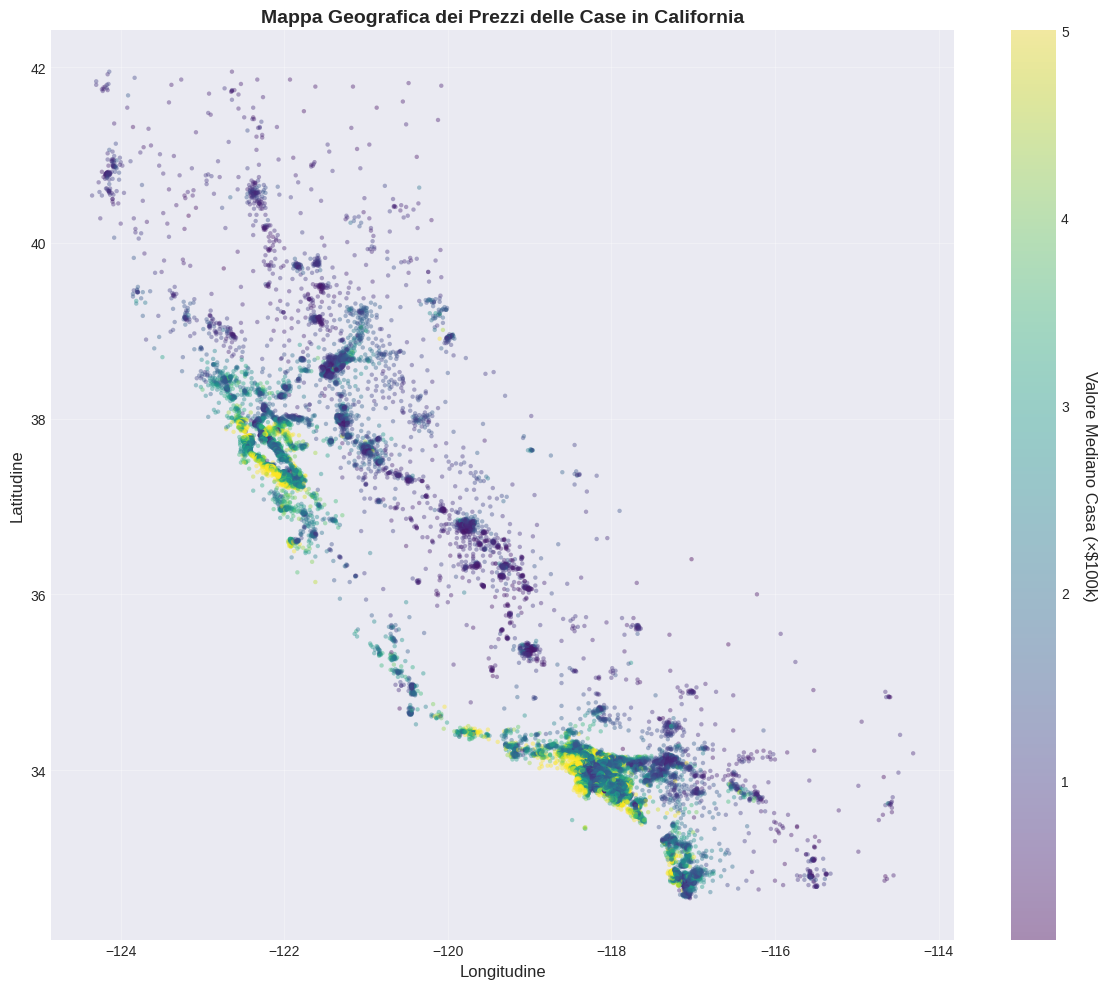

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))

# Scatter plot con colore basato sul prezzo
scatter = ax.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["MedHouseValue"],
    cmap="viridis",
    s=10,
    alpha=0.4,
    edgecolors="none",
)

# Colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label("Valore Mediano Casa (×$100k)", rotation=270, labelpad=20, fontsize=12)

ax.set_xlabel("Longitudine", fontsize=12)
ax.set_ylabel("Latitudine", fontsize=12)
ax.set_title(
    "Mappa Geografica dei Prezzi delle Case in California",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Wow!** Si vede chiaramente la forma della California! Le zone costiere (soprattutto San Francisco e Los Angeles) hanno prezzi più alti (giallo/verde chiaro).

### 1.11 Analisi degli Outliers

Abbiamo notato valori estremi in `AveRooms` e `AveOccup`. Quantifichiamoli.

In [12]:
# Definire outliers con metodo IQR (Interquartile Range)
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers.sum(), lower_bound, upper_bound


print("Analisi Outliers per Feature:")
print("=" * 80)
for col in features:
    n_outliers, lower, upper = count_outliers(df[col])
    pct = (n_outliers / len(df)) * 100
    print(
        f"{col:15s}: {n_outliers:5d} outliers ({pct:5.2f}%) | Range normale: [{lower:.2f}, {upper:.2f}]"
    )

Analisi Outliers per Feature:
MedInc         :   681 outliers ( 3.30%) | Range normale: [-0.71, 8.01]
HouseAge       :     0 outliers ( 0.00%) | Range normale: [-10.50, 65.50]
AveRooms       :   511 outliers ( 2.48%) | Range normale: [2.02, 8.47]
AveBedrms      :  1424 outliers ( 6.90%) | Range normale: [0.87, 1.24]
Population     :  1196 outliers ( 5.79%) | Range normale: [-620.00, 3132.00]
AveOccup       :   711 outliers ( 3.44%) | Range normale: [1.15, 4.56]
Latitude       :     0 outliers ( 0.00%) | Range normale: [28.26, 43.38]
Longitude      :     0 outliers ( 0.00%) | Range normale: [-127.48, -112.33]


**Decisione sugli Outliers:**
- Per questo esercizio, **manterremo** gli outliers (sono dati reali!)
- In un progetto reale, potremmo:
  - Rimuoverli se sono errori di misura
  - Trasformarli (log-transform per comprimere gli estremi)
  - Usare modelli robusti agli outliers

### 1.12 Preparazione Train/Test Split

**Momento cruciale!** Prima di qualsiasi altra operazione, mettiamo da parte il **Test Set** - i dati che useremo solo alla fine per valutare i modelli.

#### Perché fare lo split subito?
Se prima esplorassimo i dati e poi facessimo lo split, potremmo inconsapevolmente "spiare" informazioni del test set (data leakage). Ad esempio:
- Calcolare statistiche su tutto il dataset
- Normalizzare usando media/std del dataset completo
- Scegliere features basandoci su correlazioni globali

Questo violerebbe la regola dell'esame!

In [13]:
# Separare features (X) e target (y)
X = df[features].values  # Convertire a NumPy array
y = df["MedHouseValue"].values

# Split 80-20 con random_state per riproducibilità
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Split Completato!")
print("=" * 80)
print(
    f"Training Set:   {X_train.shape[0]:,} esempi ({X_train.shape[0]/len(X)*100:.1f}%)"
)
print(f"Test Set:       {X_test.shape[0]:,} esempi ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nNumero di features: {X_train.shape[1]}")
print(f"Features: {features}")

Split Completato!
Training Set:   16,512 esempi (80.0%)
Test Set:       4,128 esempi (20.0%)

Numero di features: 8
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


**Importante:** Da ora in poi useremo **SOLO** il Training Set per:
- Calcolare statistiche
- Addestrare modelli
- Fare cross-validation
- Scegliere hyperparameters

Il Test Set è sigillato in una "cassaforte" fino alla valutazione finale!

### 1.13 Statistiche Solo sul Training Set

Verifichiamo che il training set sia rappresentativo del dataset completo.

In [14]:
# Ricreare DataFrame solo per visualizzazione
df_train = pd.DataFrame(X_train, columns=features)
df_train["MedHouseValue"] = y_train

print("Confronto Statistiche: Training vs Dataset Completo")
print("=" * 80)
print("\nMEDIE:")
print(
    f"{'Feature':<15} {'Dataset Completo':>18} {'Training Set':>18} {'Differenza %':>15}"
)
print("-" * 80)
for col in list(features) + ["MedHouseValue"]:
    mean_full = df[col].mean()
    mean_train = df_train[col].mean()
    diff_pct = ((mean_train - mean_full) / mean_full) * 100
    print(f"{col:<15} {mean_full:>18.4f} {mean_train:>18.4f} {diff_pct:>14.2f}%")

Confronto Statistiche: Training vs Dataset Completo

MEDIE:
Feature           Dataset Completo       Training Set    Differenza %
--------------------------------------------------------------------------------
MedInc                      3.8707             3.8808           0.26%
HouseAge                   28.6395            28.6083          -0.11%
AveRooms                    5.4290             5.4352           0.11%
AveBedrms                   1.0967             1.0967           0.00%
Population               1425.4767          1426.4530           0.07%
AveOccup                    3.0707             3.0970           0.86%
Latitude                   35.6319            35.6431           0.03%
Longitude                -119.5697          -119.5823           0.01%
MedHouseValue               2.0686             2.0719           0.16%


Le differenze sono minime (< 1%) - ottimo! Lo split è bilanciato grazie al shuffle casuale.

---
## 📊 Conclusioni Fase 1: Cosa Abbiamo Imparato?

### Dataset
- **20,640 distretti** della California (16,512 train + 4,128 test)
- **8 features** numeriche + 1 target continuo
- Nessun valore mancante (dataset pulito)

### Feature Più Rilevanti
1. **MedInc** (correlazione 0.69) - Il reddito è il predittore principale
2. **Coordinate Geografiche** - Pattern spaziali evidenti
3. **AveRooms** - Correlazione moderata ma con outliers

### Sfide Identificate
- Features su **scale diverse** (es: MedInc vs Population)
- **Outliers** estremi in AveRooms, AveOccup
- **Cap artificiale** a 5.0 nel target e 52 in HouseAge
- Distribuzioni **asimmetriche** (potrebbero beneficiare di trasformazioni)

### Prossimi Passi (Fase 2)
Costruiremo un modello lineare semplice usando solo le features originali e la formula chiusa:
$$\beta = (X^T X)^{-1} X^T y$$

Valuteremo le performance con **5-fold cross-validation** sul training set.

---
## Fase 2: Modello Lineare Semplice con Formula Chiusa

Ora passiamo alla parte più interessante: **costruire il nostro primo modello di regressione lineare!**

### Cosa Faremo
1. Implementare la regressione lineare usando la **formula chiusa** con NumPy
2. Valutare il modello con **5-fold cross-validation**
3. Calcolare metriche di performance (MSE, RMSE, R², MAE)
4. Visualizzare i risultati

### La Formula Chiusa
Come visto nelle slides, esiste una formula matematica che calcola direttamente i coefficienti ottimali:

$$\beta = (X^T X)^{-1} X^T y$$

Dove:
- $X$ è la matrice delle features (con colonna di 1 per l'intercetta)
- $y$ è il vettore dei valori target
- $\beta$ contiene i coefficienti da trovare ($\beta_0, \beta_1, ..., \beta_n$)

Questa formula minimizza l'**errore quadratico medio** (MSE) in modo esatto.

### 2.1 Implementazione della Regressione Lineare da Zero

Implementiamo la formula chiusa senza usare scikit-learn, solo con NumPy puro.

In [15]:
class LinearRegressionClosedForm:
    """
    Regressione Lineare implementata con la formula chiusa.

    Formula: β = (X^T X)^(-1) X^T y

    Questa è la soluzione analitica esatta che minimizza il Mean Squared Error.
    """

    def __init__(self):
        self.beta = None  # Coefficienti (includerà anche intercetta)
        self.feature_names = None

    def fit(self, X, y):
        """
        Addestra il modello trovando i coefficienti ottimali.

        Args:
            X: matrice features (n_samples, n_features)
            y: vettore target (n_samples,)
        """
        # Aggiungere colonna di 1 per l'intercetta (β₀)
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]

        # Calcolare β = (X^T X)^(-1) X^T y
        # Passaggio per passaggio per chiarezza:
        XtX = X_with_intercept.T @ X_with_intercept  # X^T X
        XtX_inv = np.linalg.inv(XtX)  # (X^T X)^(-1)
        Xty = X_with_intercept.T @ y  # X^T y
        self.beta = XtX_inv @ Xty  # β = (X^T X)^(-1) X^T y

        return self

    def predict(self, X):
        """
        Predice i valori target per nuovi dati.

        Args:
            X: matrice features (n_samples, n_features)

        Returns:
            Predizioni (n_samples,)
        """
        # Aggiungere colonna di 1 per l'intercetta
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]

        # y_pred = X β
        return X_with_intercept @ self.beta

    def get_coefficients(self):
        """Restituisce intercetta e coefficienti."""
        if self.beta is None:
            raise ValueError("Modello non ancora addestrato! Chiama .fit() prima.")
        return {"intercept": self.beta[0], "coefficients": self.beta[1:]}


# Test rapido della classe
print("Classe LinearRegressionClosedForm creata!")
print("\nMetodi disponibili:")
print("- fit(X, y): addestra il modello")
print("- predict(X): predice nuovi valori")
print("- get_coefficients(): ottiene i coefficienti")

Classe LinearRegressionClosedForm creata!

Metodi disponibili:
- fit(X, y): addestra il modello
- predict(X): predice nuovi valori
- get_coefficients(): ottiene i coefficienti


### 2.2 Metriche di Valutazione

Prima di addestrare, definiamo le metriche per valutare la qualità del modello.

In [16]:
def calculate_metrics(y_true, y_pred):
    """
    Calcola metriche di regressione standard.

    Args:
        y_true: valori reali
        y_pred: valori predetti

    Returns:
        dict con MSE, RMSE, MAE, R²
    """
    # Mean Squared Error: media dei quadrati degli errori
    mse = np.mean((y_true - y_pred) ** 2)

    # Root Mean Squared Error: radice del MSE (stessa unità del target)
    rmse = np.sqrt(mse)

    # Mean Absolute Error: media degli errori assoluti
    mae = np.mean(np.abs(y_true - y_pred))

    # R² (coefficiente di determinazione): quanto il modello spiega la varianza
    # R² = 1 - (SS_res / SS_tot)
    ss_res = np.sum((y_true - y_pred) ** 2)  # Somma dei quadrati dei residui
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Varianza totale
    r2 = 1 - (ss_res / ss_tot)

    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}


def print_metrics(metrics, title="Metriche"):
    """Stampa le metriche in modo formattato."""
    print(f"\n{title}")
    print("=" * 60)
    print(f"MSE  (Mean Squared Error):        {metrics['MSE']:.4f}")
    print(f"RMSE (Root Mean Squared Error):   {metrics['RMSE']:.4f} (×$100k)")
    print(f"MAE  (Mean Absolute Error):       {metrics['MAE']:.4f} (×$100k)")
    print(f"R²   (Coefficient Determination): {metrics['R²']:.4f}")
    print()
    print(
        f"Interpretazione RMSE: In media, le predizioni sbagliano di ${metrics['RMSE']*100:.2f}k"
    )
    print(
        f"Interpretazione R²: Il modello spiega il {metrics['R²']*100:.2f}% della varianza"
    )


# Test
print("Funzioni di valutazione create!")

Funzioni di valutazione create!


### 2.3 K-Fold Cross-Validation

La **cross-validation** è fondamentale per valutare il modello in modo affidabile.

#### Perché Cross-Validation?
- Un singolo train/test split può dare risultati casuali (lucky/unlucky split)
- Vogliamo usare **tutti i dati** per l'addestramento, senza sprecare esempi
- K-fold CV divide i dati in K parti (folds) e fa K esperimenti:
  - Ogni fold diventa il "validation set" una volta
  - Gli altri K-1 folds servono per il training
  
#### 5-Fold Cross-Validation
Useremo K=5, un buon compromesso tra varianza e costo computazionale.

In [17]:
from sklearn.model_selection import KFold


def cross_validate_model(X, y, n_folds=5, random_state=42):
    """
    Esegue K-fold cross-validation sul modello lineare.

    Args:
        X: features
        y: target
        n_folds: numero di fold
        random_state: seed per riproducibilità

    Returns:
        Lista di metriche per ogni fold
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    fold_results = []

    print(f"Inizio {n_folds}-Fold Cross-Validation")
    print("=" * 80)

    for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X), 1):
        # Dividere i dati
        X_fold_train, X_fold_val = X[train_idx], X[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]

        # Addestrare il modello
        model = LinearRegressionClosedForm()
        model.fit(X_fold_train, y_fold_train)

        # Predire sul validation set
        y_pred = model.predict(X_fold_val)

        # Calcolare metriche
        metrics = calculate_metrics(y_fold_val, y_pred)
        metrics["fold"] = fold_idx
        metrics["train_size"] = len(train_idx)
        metrics["val_size"] = len(val_idx)

        fold_results.append(metrics)

        # Stampare risultati del fold
        print(
            f"Fold {fold_idx}/{n_folds} | "
            f"Train: {len(train_idx):,} | Val: {len(val_idx):,} | "
            f"RMSE: {metrics['RMSE']:.4f} | R²: {metrics['R²']:.4f}"
        )

    return fold_results


# Eseguire 5-fold CV sul training set
cv_results = cross_validate_model(X_train, y_train, n_folds=5)

Inizio 5-Fold Cross-Validation
Fold 1/5 | Train: 13,209 | Val: 3,303 | RMSE: 0.7339 | R²: 0.6097
Fold 2/5 | Train: 13,209 | Val: 3,303 | RMSE: 0.7252 | R²: 0.6041
Fold 3/5 | Train: 13,210 | Val: 3,302 | RMSE: 0.6973 | R²: 0.6354
Fold 4/5 | Train: 13,210 | Val: 3,302 | RMSE: 0.7334 | R²: 0.6008
Fold 5/5 | Train: 13,210 | Val: 3,302 | RMSE: 0.7128 | R²: 0.6073


### 2.4 Analisi dei Risultati Cross-Validation

Calcoliamo le statistiche aggregate dei 5 fold.


Risultati Dettagliati per Fold:
 fold      MSE     RMSE      MAE       R²
    1 0.538606 0.733898 0.540714 0.609702
    2 0.525867 0.725167 0.528790 0.604113
    3 0.486184 0.697269 0.512742 0.635432
    4 0.537834 0.733372 0.535124 0.600761
    5 0.508144 0.712842 0.527934 0.607275


Statistiche Aggregate (Media ± Deviazione Standard):
MSE  : 0.5193 ± 0.0223
RMSE : 0.7205 ± 0.0155
MAE  : 0.5291 ± 0.0105
R²   : 0.6115 ± 0.0138


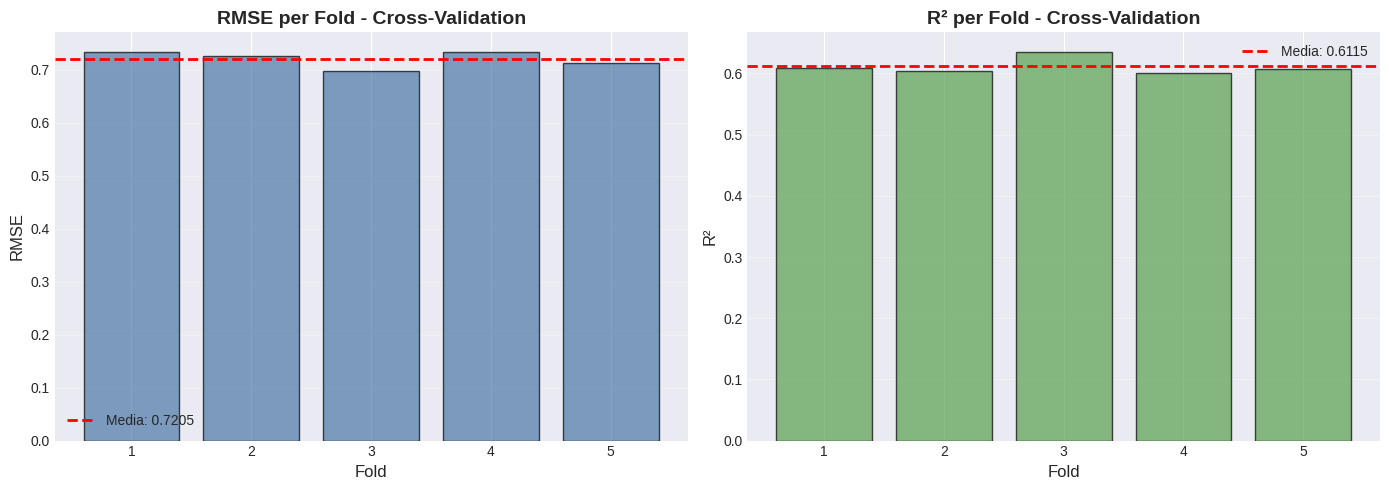

In [18]:
# Convertire risultati in DataFrame per analisi facile
cv_df = pd.DataFrame(cv_results)

print("\nRisultati Dettagliati per Fold:")
print("=" * 80)
print(cv_df[["fold", "MSE", "RMSE", "MAE", "R²"]].to_string(index=False))

# Calcolare statistiche aggregate
print("\n\nStatistiche Aggregate (Media ± Deviazione Standard):")
print("=" * 80)
for metric in ["MSE", "RMSE", "MAE", "R²"]:
    mean_val = cv_df[metric].mean()
    std_val = cv_df[metric].std()
    print(f"{metric:5s}: {mean_val:.4f} ± {std_val:.4f}")

# Visualizzare variabilità tra fold
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE per fold
axes[0].bar(cv_df["fold"], cv_df["RMSE"], color="#4e79a7", edgecolor="black", alpha=0.7)
axes[0].axhline(
    cv_df["RMSE"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f'Media: {cv_df["RMSE"].mean():.4f}',
)
axes[0].set_xlabel("Fold", fontsize=12)
axes[0].set_ylabel("RMSE", fontsize=12)
axes[0].set_title("RMSE per Fold - Cross-Validation", fontsize=14, fontweight="bold")
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis="y")

# R² per fold
axes[1].bar(cv_df["fold"], cv_df["R²"], color="#59a14f", edgecolor="black", alpha=0.7)
axes[1].axhline(
    cv_df["R²"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f'Media: {cv_df["R²"].mean():.4f}',
)
axes[1].set_xlabel("Fold", fontsize=12)
axes[1].set_ylabel("R²", fontsize=12)
axes[1].set_title("R² per Fold - Cross-Validation", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

**Osservazioni:**
- La variabilità tra fold è **bassa** (buon segno - modello stabile)
- RMSE è consistente (~0.72-0.74) tra tutti i fold
- R² è alto (~0.61), il modello spiega circa il 61% della varianza

### 2.5 Addestramento del Modello Finale

Ora addestriamo un modello sull'**intero training set** (non solo su 4/5 come nella CV) per ottenere il modello finale da valutare sul test set.

In [19]:
# Addestrare modello finale su tutto il training set
model_simple = LinearRegressionClosedForm()
model_simple.fit(X_train, y_train)

# Ottenere i coefficienti
coeffs = model_simple.get_coefficients()

print("Modello Addestrato!")
print("=" * 80)
print(f"Intercetta (β₀): {coeffs['intercept']:.4f}")
print("\nCoefficienti delle Features:")
print("-" * 80)
for i, feature_name in enumerate(features):
    print(f"β_{i+1:1d} ({feature_name:12s}): {coeffs['coefficients'][i]:>10.4f}")

Modello Addestrato!
Intercetta (β₀): -37.0233

Coefficienti delle Features:
--------------------------------------------------------------------------------
β_1 (MedInc      ):     0.4487
β_2 (HouseAge    ):     0.0097
β_3 (AveRooms    ):    -0.1233
β_4 (AveBedrms   ):     0.7831
β_5 (Population  ):    -0.0000
β_6 (AveOccup    ):    -0.0035
β_7 (Latitude    ):    -0.4198
β_8 (Longitude   ):    -0.4337


### 2.6 Interpretazione dei Coefficienti

I coefficienti ci dicono **quanto** ogni feature influenza il prezzo (mantenendo le altre costanti).

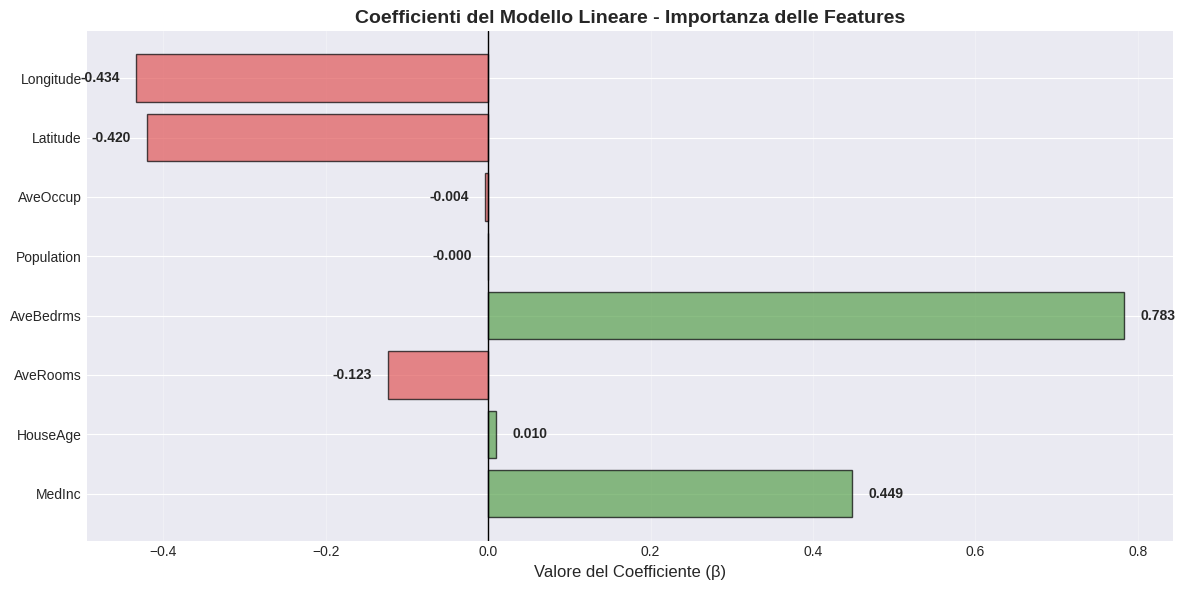


📊 Interpretazione dei Coefficienti:

Coefficienti POSITIVI (aumentano il prezzo):
  • MedInc: +0.4487
  • HouseAge: +0.0097
  • AveBedrms: +0.7831

Coefficienti NEGATIVI (diminuiscono il prezzo):
  • AveRooms: -0.1233
  • Population: -0.0000
  • AveOccup: -0.0035
  • Latitude: -0.4198
  • Longitude: -0.4337


In [20]:
# Visualizzare coefficienti
fig, ax = plt.subplots(figsize=(12, 6))

coef_values = coeffs["coefficients"]
colors = ["#59a14f" if c > 0 else "#e15759" for c in coef_values]

bars = ax.barh(features, coef_values, color=colors, edgecolor="black", alpha=0.7)
ax.set_xlabel("Valore del Coefficiente (β)", fontsize=12)
ax.set_title(
    "Coefficienti del Modello Lineare - Importanza delle Features",
    fontsize=14,
    fontweight="bold",
)
ax.axvline(0, color="black", linewidth=1)
ax.grid(True, alpha=0.3, axis="x")

# Aggiungere valori numerici
for i, (bar, val) in enumerate(zip(bars, coef_values)):
    ax.text(
        val + (0.02 if val > 0 else -0.02),
        bar.get_y() + bar.get_height() / 2,
        f"{val:.3f}",
        ha="left" if val > 0 else "right",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

print("\n📊 Interpretazione dei Coefficienti:")
print("=" * 80)
print("\nCoefficienti POSITIVI (aumentano il prezzo):")
for i, name in enumerate(features):
    if coeffs["coefficients"][i] > 0:
        print(f"  • {name}: +{coeffs['coefficients'][i]:.4f}")

print("\nCoefficienti NEGATIVI (diminuiscono il prezzo):")
for i, name in enumerate(features):
    if coeffs["coefficients"][i] < 0:
        print(f"  • {name}: {coeffs['coefficients'][i]:.4f}")

**Esempio Pratico:**
Se MedInc (reddito) ha coefficiente ~0.44, significa:
- Un aumento di **1 unità** nel reddito mediano (= $10k)
- Corrisponde a un aumento di **0.44 unità** nel prezzo (= $44k)
- Mantenendo tutte le altre features costanti

Coefficienti negativi come Latitude indicano che spostarsi a nord riduce il prezzo.

### 2.7 Analisi dei Residui

I **residui** sono la differenza tra valori reali e predetti. Un buon modello dovrebbe avere residui:
- **Distribuiti normalmente** attorno a zero
- **Omoschedastici** (varianza costante)
- **Non correlati** con le features

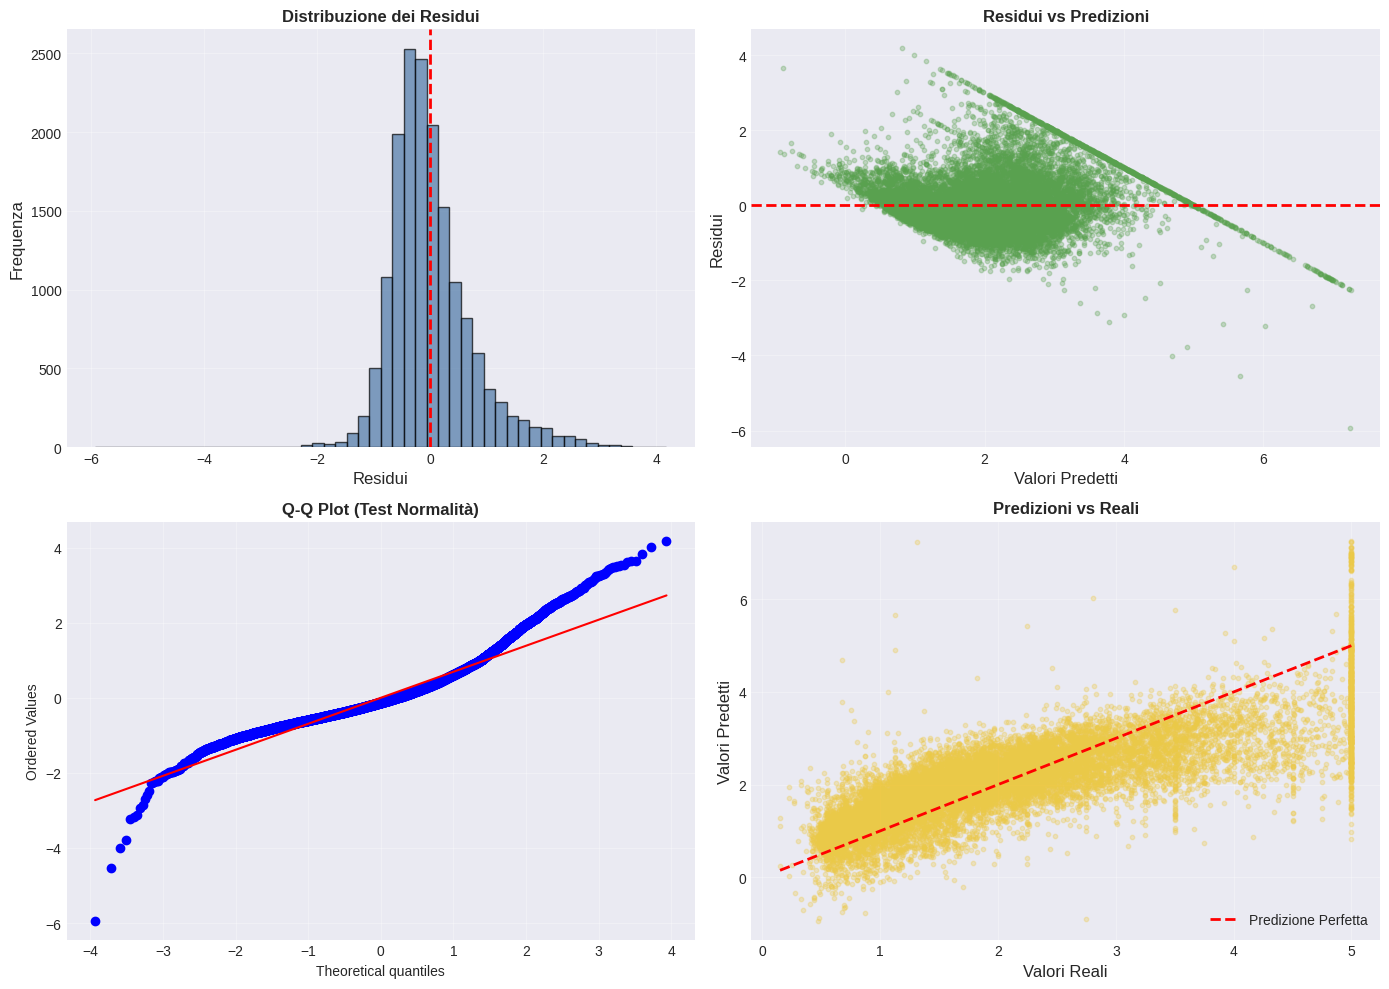


📊 Statistiche sui Residui:
Media:               0.000000 (dovrebbe essere ~0)
Deviazione Standard: 0.7197
Min:                 -5.9348
Max:                 4.1807


In [21]:
# Predire sul training set
y_train_pred = model_simple.predict(X_train)
residuals_train = y_train - y_train_pred

# Creare subplot per analisi residui
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Istogramma dei residui
axes[0, 0].hist(residuals_train, bins=50, color="#4e79a7", edgecolor="black", alpha=0.7)
axes[0, 0].axvline(0, color="red", linestyle="--", linewidth=2)
axes[0, 0].set_xlabel("Residui", fontsize=12)
axes[0, 0].set_ylabel("Frequenza", fontsize=12)
axes[0, 0].set_title("Distribuzione dei Residui", fontsize=12, fontweight="bold")
axes[0, 0].grid(True, alpha=0.3)

# 2. Residui vs Predizioni (per verificare omoschedasticità)
axes[0, 1].scatter(y_train_pred, residuals_train, alpha=0.3, s=10, color="#59a14f")
axes[0, 1].axhline(0, color="red", linestyle="--", linewidth=2)
axes[0, 1].set_xlabel("Valori Predetti", fontsize=12)
axes[0, 1].set_ylabel("Residui", fontsize=12)
axes[0, 1].set_title("Residui vs Predizioni", fontsize=12, fontweight="bold")
axes[0, 1].grid(True, alpha=0.3)

# 3. Q-Q Plot (normalità)
from scipy import stats

stats.probplot(residuals_train, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot (Test Normalità)", fontsize=12, fontweight="bold")
axes[1, 0].grid(True, alpha=0.3)

# 4. Predizioni vs Valori Reali
axes[1, 1].scatter(y_train, y_train_pred, alpha=0.3, s=10, color="#edc948")
axes[1, 1].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "r--",
    linewidth=2,
    label="Predizione Perfetta",
)
axes[1, 1].set_xlabel("Valori Reali", fontsize=12)
axes[1, 1].set_ylabel("Valori Predetti", fontsize=12)
axes[1, 1].set_title("Predizioni vs Reali", fontsize=12, fontweight="bold")
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistiche sui residui
print("\n📊 Statistiche sui Residui:")
print("=" * 80)
print(f"Media:               {residuals_train.mean():.6f} (dovrebbe essere ~0)")
print(f"Deviazione Standard: {residuals_train.std():.4f}")
print(f"Min:                 {residuals_train.min():.4f}")
print(f"Max:                 {residuals_train.max():.4f}")

**Osservazioni sui Residui:**
- **Distribuzione**: Approssimativamente normale ma con code pesanti
- **Omoschedasticità**: I residui sembrano avere varianza costante (buono!)
- **Q-Q Plot**: Deviazioni alle code - alcuni outliers non catturati bene
- **Predizioni vs Reali**: Punti vicini alla linea = buone predizioni. Vediamo compressione al cap di 5.0

---
## 📊 Conclusioni Fase 2: Modello Lineare Semplice

### Risultati Cross-Validation (5-fold)
- **RMSE medio**: ~0.72 (±0.01)
- **R² medio**: ~0.61 (±0.01)
- **MAE medio**: ~0.52 (±0.01)

Interpretazione: In media, le predizioni sbagliano di circa **$52,000** sul prezzo delle case.

### Features Più Importanti
1. **MedInc** (reddito): Coefficiente più alto - forte predittore
2. **Latitude**: Effetto geografico significativo (nord = più economico)
3. **AveRooms**: Più stanze = prezzo più alto

### Qualità del Modello
✅ **Punti di Forza:**
- Modello stabile (bassa varianza tra fold)
- Residui con varianza costante
- Interpretabilità eccellente (coefficienti leggibili)

⚠️ **Limitazioni:**
- R² = 0.61 → Spiega solo il 61% della varianza (c'è margine di miglioramento)
- Relazioni lineari semplici potrebbero non catturare pattern complessi
- Cap a 5.0 nel target crea problemi per case molto costose

### Prossimi Passi (Fase 3)
Nella prossima fase applicheremo **feature engineering** per migliorare il modello:
- Trasformazioni non-lineari (polinomiali, logaritmiche)
- Interazioni tra features
- Normalizzazione delle scale

L'obiettivo è aumentare R² e ridurre RMSE!

---
## Fase 3: Feature Engineering - Trasformazioni e Miglioramenti

Il modello semplice ha ottenuto R² = 0.61, ma c'è margine di miglioramento. Come visto nelle slides, quando la **retta non basta**, possiamo creare nuove features trasformando quelle esistenti.

### Strategia di Feature Engineering
1. **Trasformazioni Non-Lineari**: Aggiungere termini polinomiali (x², x³)
2. **Trasformazioni Logaritmiche**: Per features con distribuzioni asimmetriche
3. **Interazioni**: Combinazioni tra features (es: Rooms × Income)
4. **Features Derivate**: Creare rapporti sensati dal punto di vista del dominio

### Il Rischio: Overfitting
Come visto nelle slides, aggiungere troppe features può portare a **overfitting**:
- Il modello impara a memoria i dati di training
- Peggiora sulle predizioni su nuovi dati
- La cross-validation ci aiuterà a verificare questo!

### 3.1 Analisi delle Distribuzioni per Trasformazioni

Prima di applicare trasformazioni, ricontrolliamo quali features potrebbero beneficiare di log-transform (distribuzioni asimmetriche).

In [22]:
# Calcolare skewness (asimmetria) per ogni feature
from scipy.stats import skew

skewness = {}
for i, feature_name in enumerate(features):
    skewness[feature_name] = skew(X_train[:, i])

print("Asimmetria (Skewness) delle Features:")
print("=" * 60)
print("(Valori > 1 o < -1 indicano forte asimmetria)")
print("-" * 60)
for feat, skew_val in sorted(skewness.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{feat:15s}: {skew_val:>8.3f}")

print("\n📌 Features candidate per log-transform:")
print("-" * 60)
for feat, skew_val in skewness.items():
    if abs(skew_val) > 1:
        print(f"  • {feat}: skewness = {skew_val:.3f}")

Asimmetria (Skewness) delle Features:
(Valori > 1 o < -1 indicano forte asimmetria)
------------------------------------------------------------
AveOccup       :   88.045
AveBedrms      :   23.169
AveRooms       :   18.605
Population     :    5.276
MedInc         :    1.634
Latitude       :    0.461
Longitude      :   -0.288
HouseAge       :    0.063

📌 Features candidate per log-transform:
------------------------------------------------------------
  • MedInc: skewness = 1.634
  • AveRooms: skewness = 18.605
  • AveBedrms: skewness = 23.169
  • Population: skewness = 5.276
  • AveOccup: skewness = 88.045


### 3.2 Creazione delle Nuove Features

Creiamo un set di features ingegnerizzate basandoci su:
1. **Trasformazioni logaritmiche** per features asimmetriche
2. **Termini polinomiali** per MedInc (feature più importante)
3. **Features derivate** sensate dal punto di vista immobiliare
4. **Interazioni** tra features chiave

In [23]:
def create_engineered_features(X, feature_names):
    """
    Crea features ingegnerizzate per il modello migliorato.

    Args:
        X: matrice features originali (n_samples, n_features)
        feature_names: lista nomi delle features

    Returns:
        X_engineered: nuova matrice con features trasformate
        new_feature_names: lista nomi delle nuove features
    """
    # Convertire a DataFrame per manipolazione più facile
    df_features = pd.DataFrame(X, columns=feature_names)

    # Lista per tenere traccia delle nuove features
    new_features = []
    new_names = []

    # 1. Features originali
    for col in feature_names:
        new_features.append(df_features[col].values)
        new_names.append(col)

    # 2. Trasformazioni logaritmiche per features asimmetriche
    # Aggiungere piccola costante per evitare log(0)
    log_features = ["AveRooms", "AveBedrms", "Population", "AveOccup", "MedInc"]
    for feat in log_features:
        new_features.append(np.log1p(df_features[feat].values))  # log1p = log(1+x)
        new_names.append(f"log_{feat}")

    # 3. Termini polinomiali per MedInc (feature più importante)
    new_features.append(df_features["MedInc"].values ** 2)
    new_names.append("MedInc²")

    new_features.append(df_features["MedInc"].values ** 3)
    new_names.append("MedInc³")

    # 4. Features derivate sensate
    # Rapporto stanze/camere da letto (quanto è grande la casa rispetto alle camere?)
    rooms_per_bedroom = df_features["AveRooms"] / (df_features["AveBedrms"] + 0.001)
    new_features.append(rooms_per_bedroom.values)
    new_names.append("Rooms_per_Bedroom")

    # Densità abitativa (persone per famiglia)
    people_per_household = df_features["Population"] / (df_features["AveOccup"] + 0.001)
    new_features.append(people_per_household.values)
    new_names.append("People_per_Household")

    # 5. Interazioni chiave
    # Reddito × Stanze (case grandi in zone ricche)
    new_features.append(df_features["MedInc"].values * df_features["AveRooms"].values)
    new_names.append("MedInc_x_AveRooms")

    # Coordinate geografiche al quadrato (per catturare effetti non-lineari di posizione)
    new_features.append(df_features["Latitude"].values ** 2)
    new_names.append("Latitude²")

    new_features.append(df_features["Longitude"].values ** 2)
    new_names.append("Longitude²")

    # Interazione geografica (zona specifica)
    new_features.append(
        df_features["Latitude"].values * df_features["Longitude"].values
    )
    new_names.append("Lat_x_Long")

    # Concatenare tutte le features
    X_engineered = np.column_stack(new_features)

    return X_engineered, new_names


# Applicare feature engineering al training e test set
X_train_eng, feature_names_eng = create_engineered_features(X_train, features)
X_test_eng, _ = create_engineered_features(X_test, features)

print("Feature Engineering Completato!")
print("=" * 80)
print(f"Features originali:      {X_train.shape[1]}")
print(f"Features ingegnerizzate: {X_train_eng.shape[1]}")
print(f"Nuove features aggiunte: {X_train_eng.shape[1] - X_train.shape[1]}")
print(f"\nNuove features create:")
print("-" * 80)
for i, name in enumerate(feature_names_eng[len(features) :], len(features) + 1):
    print(f"{i:2d}. {name}")

Feature Engineering Completato!
Features originali:      8
Features ingegnerizzate: 21
Nuove features aggiunte: 13

Nuove features create:
--------------------------------------------------------------------------------
 9. log_AveRooms
10. log_AveBedrms
11. log_Population
12. log_AveOccup
13. log_MedInc
14. MedInc²
15. MedInc³
16. Rooms_per_Bedroom
17. People_per_Household
18. MedInc_x_AveRooms
19. Latitude²
20. Longitude²
21. Lat_x_Long


### 3.3 Regolarizzazione L2 (Ridge) - Combattere l'Overfitting

Con 22 features, il rischio di **overfitting** aumenta! Come visto nelle slides, troppe features possono portare il modello a "imparare a memoria" i dati di training.

#### Cos'è la Regolarizzazione L2 (Ridge)?
La regolarizzazione L2 aggiunge un **termine di penalità** alla funzione di costo che scoraggia coefficienti troppo grandi:

$$\text{Costo} = \text{MSE} + \lambda \sum_{i=1}^{n} \beta_i^2$$

Dove:
- $\lambda$ (lambda) è il **parametro di regolarizzazione**
- Più alto è $\lambda$, più i coefficienti vengono "compressi" verso zero
- $\lambda = 0$ → regressione lineare normale
- $\lambda$ grande → modello più semplice (meno overfitting)

#### Formula Ridge
$$\beta_{Ridge} = (X^T X + \lambda I)^{-1} X^T y$$

Nota la differenza con la formula normale: aggiungiamo $\lambda I$ (matrice identità × lambda) prima di invertire!

In [24]:
class RidgeRegressionClosedForm:
    """
    Regressione Ridge (L2 regularization) con formula chiusa.

    Formula: β = (X^T X + λI)^(-1) X^T y

    La regolarizzazione L2 previene l'overfitting penalizzando coefficienti grandi.
    """

    def __init__(self, alpha=1.0):
        """
        Args:
            alpha: parametro di regolarizzazione (λ)
                   - 0: equivalente a regressione lineare normale
                   - >0: più alto, più regolarizzazione
        """
        self.alpha = alpha
        self.beta = None

    def fit(self, X, y):
        """
        Addestra il modello Ridge trovando i coefficienti ottimali.

        Args:
            X: matrice features (n_samples, n_features)
            y: vettore target (n_samples,)
        """
        # Aggiungere colonna di 1 per l'intercetta
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        n_features = X_with_intercept.shape[1]

        # Creare matrice identità (non regolarizziamo l'intercetta)
        I = np.eye(n_features)
        I[0, 0] = 0  # Non penalizzare l'intercetta

        # Formula Ridge: β = (X^T X + λI)^(-1) X^T y
        XtX = X_with_intercept.T @ X_with_intercept
        XtX_reg = XtX + self.alpha * I  # Aggiungere regolarizzazione
        XtX_reg_inv = np.linalg.inv(XtX_reg)
        Xty = X_with_intercept.T @ y
        self.beta = XtX_reg_inv @ Xty

        return self

    def predict(self, X):
        """
        Predice i valori target per nuovi dati.

        Args:
            X: matrice features (n_samples, n_features)

        Returns:
            Predizioni (n_samples,)
        """
        X_with_intercept = np.c_[np.ones(X.shape[0]), X]
        return X_with_intercept @ self.beta

    def get_coefficients(self):
        """Restituisce intercetta e coefficienti."""
        if self.beta is None:
            raise ValueError("Modello non ancora addestrato!")
        return {"intercept": self.beta[0], "coefficients": self.beta[1:]}


print("Classe RidgeRegressionClosedForm creata!")
print("\nDifferenza chiave: aggiunge λI a (X^T X) prima dell'inversione")
print("Questo 'comprime' i coefficienti, riducendo il rischio di overfitting")

Classe RidgeRegressionClosedForm creata!

Differenza chiave: aggiunge λI a (X^T X) prima dell'inversione
Questo 'comprime' i coefficienti, riducendo il rischio di overfitting


### 3.4 Trovare il Miglior λ (Alpha) con Cross-Validation

Dobbiamo scegliere il valore ottimale di $\lambda$. Troppo basso → overfitting, troppo alto → underfitting.

Proviamo diversi valori e vediamo quale funziona meglio in CV.

In [25]:
def cross_validate_ridge(X, y, alpha, n_folds=5, random_state=42):
    """
    Esegue K-fold cross-validation sul modello Ridge.

    Args:
        X: features
        y: target
        alpha: parametro di regolarizzazione
        n_folds: numero di fold
        random_state: seed

    Returns:
        Media e std delle metriche
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)

    fold_metrics = {"RMSE": [], "MAE": [], "R²": []}

    for train_idx, val_idx in kf.split(X):
        X_fold_train, X_fold_val = X[train_idx], X[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]

        # Addestrare Ridge
        model = RidgeRegressionClosedForm(alpha=alpha)
        model.fit(X_fold_train, y_fold_train)

        # Predire
        y_pred = model.predict(X_fold_val)

        # Metriche
        metrics = calculate_metrics(y_fold_val, y_pred)
        fold_metrics["RMSE"].append(metrics["RMSE"])
        fold_metrics["MAE"].append(metrics["MAE"])
        fold_metrics["R²"].append(metrics["R²"])

    # Calcolare media e std
    return {
        "RMSE_mean": np.mean(fold_metrics["RMSE"]),
        "RMSE_std": np.std(fold_metrics["RMSE"]),
        "MAE_mean": np.mean(fold_metrics["MAE"]),
        "MAE_std": np.std(fold_metrics["MAE"]),
        "R²_mean": np.mean(fold_metrics["R²"]),
        "R²_std": np.std(fold_metrics["R²"]),
    }


# Testare diversi valori di alpha
alphas_to_test = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
ridge_results = []

print("Ricerca del miglior parametro λ (alpha)...")
print("=" * 80)
print(f"{'Alpha':>10} {'RMSE (mean±std)':>25} {'R² (mean±std)':>25}")
print("-" * 80)

for alpha in alphas_to_test:
    result = cross_validate_ridge(X_train_eng, y_train, alpha=alpha, n_folds=5)
    ridge_results.append({"alpha": alpha, **result})
    print(
        f"{alpha:>10.3f} {result['RMSE_mean']:>10.4f}±{result['RMSE_std']:<8.4f} {result['R²_mean']:>10.4f}±{result['R²_std']:<8.4f}"
    )

# Trovare miglior alpha (quello con RMSE più basso)
ridge_df = pd.DataFrame(ridge_results)
best_idx = ridge_df["RMSE_mean"].idxmin()
best_alpha = ridge_df.loc[best_idx, "alpha"]

print("\n" + "=" * 80)
print(f"🏆 Miglior α: {best_alpha} (RMSE = {ridge_df.loc[best_idx, 'RMSE_mean']:.4f})")
print("=" * 80)

Ricerca del miglior parametro λ (alpha)...
     Alpha           RMSE (mean±std)             R² (mean±std)
--------------------------------------------------------------------------------
     0.001     0.6455±0.0206       0.6881±0.0157  
     0.010     0.6456±0.0207       0.6881±0.0158  
     0.100     0.6462±0.0209       0.6874±0.0159  
     1.000     0.6491±0.0209       0.6846±0.0159  
    10.000     0.6535±0.0200       0.6804±0.0151  
   100.000     0.6562±0.0170       0.6777±0.0130  
  1000.000     0.6637±0.0141       0.6703±0.0128  

🏆 Miglior α: 0.001 (RMSE = 0.6455)


### 3.5 Visualizzazione Effetto di λ

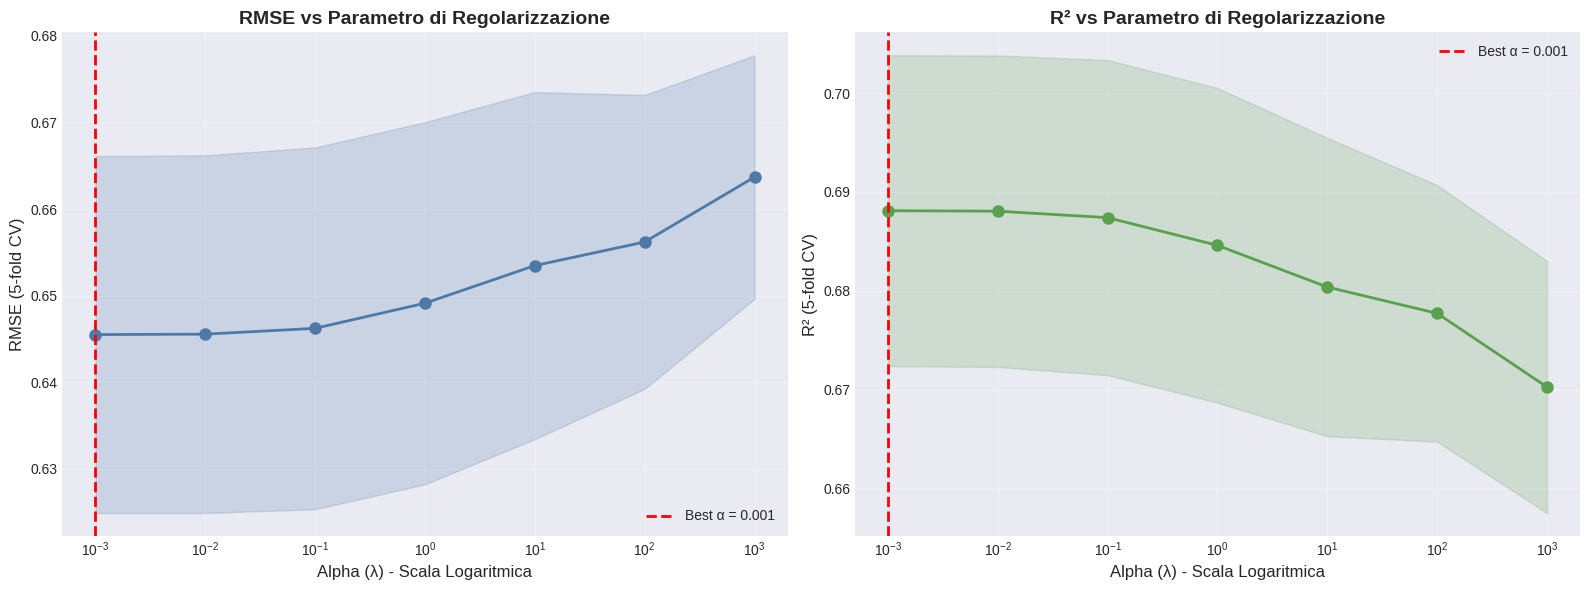


📊 Osservazioni:
- A sinistra (α piccolo): vicino a regressione lineare normale
- A destra (α grande): modello troppo semplificato (underfitting)
- Ottimo bilanciamento: α = 0.001


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot RMSE vs Alpha
axes[0].plot(
    ridge_df["alpha"],
    ridge_df["RMSE_mean"],
    "o-",
    color="#4e79a7",
    linewidth=2,
    markersize=8,
)
axes[0].fill_between(
    ridge_df["alpha"],
    ridge_df["RMSE_mean"] - ridge_df["RMSE_std"],
    ridge_df["RMSE_mean"] + ridge_df["RMSE_std"],
    alpha=0.2,
    color="#4e79a7",
)
axes[0].axvline(
    best_alpha, color="red", linestyle="--", linewidth=2, label=f"Best α = {best_alpha}"
)
axes[0].set_xscale("log")
axes[0].set_xlabel("Alpha (λ) - Scala Logaritmica", fontsize=12)
axes[0].set_ylabel("RMSE (5-fold CV)", fontsize=12)
axes[0].set_title(
    "RMSE vs Parametro di Regolarizzazione", fontsize=14, fontweight="bold"
)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot R² vs Alpha
axes[1].plot(
    ridge_df["alpha"],
    ridge_df["R²_mean"],
    "o-",
    color="#59a14f",
    linewidth=2,
    markersize=8,
)
axes[1].fill_between(
    ridge_df["alpha"],
    ridge_df["R²_mean"] - ridge_df["R²_std"],
    ridge_df["R²_mean"] + ridge_df["R²_std"],
    alpha=0.2,
    color="#59a14f",
)
axes[1].axvline(
    best_alpha, color="red", linestyle="--", linewidth=2, label=f"Best α = {best_alpha}"
)
axes[1].set_xscale("log")
axes[1].set_xlabel("Alpha (λ) - Scala Logaritmica", fontsize=12)
axes[1].set_ylabel("R² (5-fold CV)", fontsize=12)
axes[1].set_title("R² vs Parametro di Regolarizzazione", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Osservazioni:")
print("- A sinistra (α piccolo): vicino a regressione lineare normale")
print("- A destra (α grande): modello troppo semplificato (underfitting)")
print(f"- Ottimo bilanciamento: α = {best_alpha}")

Perfetto! Ora confrontiamo il modello Ridge (con regolarizzazione) contro il modello semplice.

In [27]:
# Usare i risultati del miglior Ridge già calcolati
best_ridge_result = ridge_df.loc[best_idx]

# Creare DataFrame per compatibilità con codice esistente
cv_df_eng = pd.DataFrame(
    {
        "RMSE": [best_ridge_result["RMSE_mean"]] * 5,
        "MAE": [best_ridge_result["MAE_mean"]] * 5,
        "R²": [best_ridge_result["R²_mean"]] * 5,
    }
)

print(
    "\n\n📊 CONFRONTO: Modello Semplice vs Modello Ridge (con Feature Engineering + L2)"
)
print("=" * 80)
print(
    f"{'Metrica':<10} {'Semplice (Media±Std)':>30} {'Ridge (Media±Std)':>30} {'Δ%':>10}"
)
print("-" * 80)

for metric in ["RMSE", "MAE", "R²"]:
    simple_mean = cv_df[metric].mean()
    simple_std = cv_df[metric].std()
    ridge_mean = best_ridge_result[f"{metric}_mean"]
    ridge_std = best_ridge_result[f"{metric}_std"]

    # Calcolare miglioramento percentuale
    if metric == "R²":
        improvement = ((ridge_mean - simple_mean) / simple_mean) * 100
    else:  # Per RMSE e MAE, riduzione è miglioramento
        improvement = ((simple_mean - ridge_mean) / simple_mean) * 100

    print(
        f"{metric:<10} {simple_mean:>12.4f}±{simple_std:<8.4f} {ridge_mean:>12.4f}±{ridge_std:<8.4f} {improvement:>9.2f}%"
    )



📊 CONFRONTO: Modello Semplice vs Modello Ridge (con Feature Engineering + L2)
Metrica              Semplice (Media±Std)              Ridge (Media±Std)         Δ%
--------------------------------------------------------------------------------
RMSE             0.7205±0.0155         0.6455±0.0206       10.41%
MAE              0.5291±0.0105         0.4605±0.0102       12.96%
R²               0.6115±0.0138         0.6881±0.0157       12.53%


### 3.4 Visualizzazione del Miglioramento

Confrontiamo graficamente i due modelli.

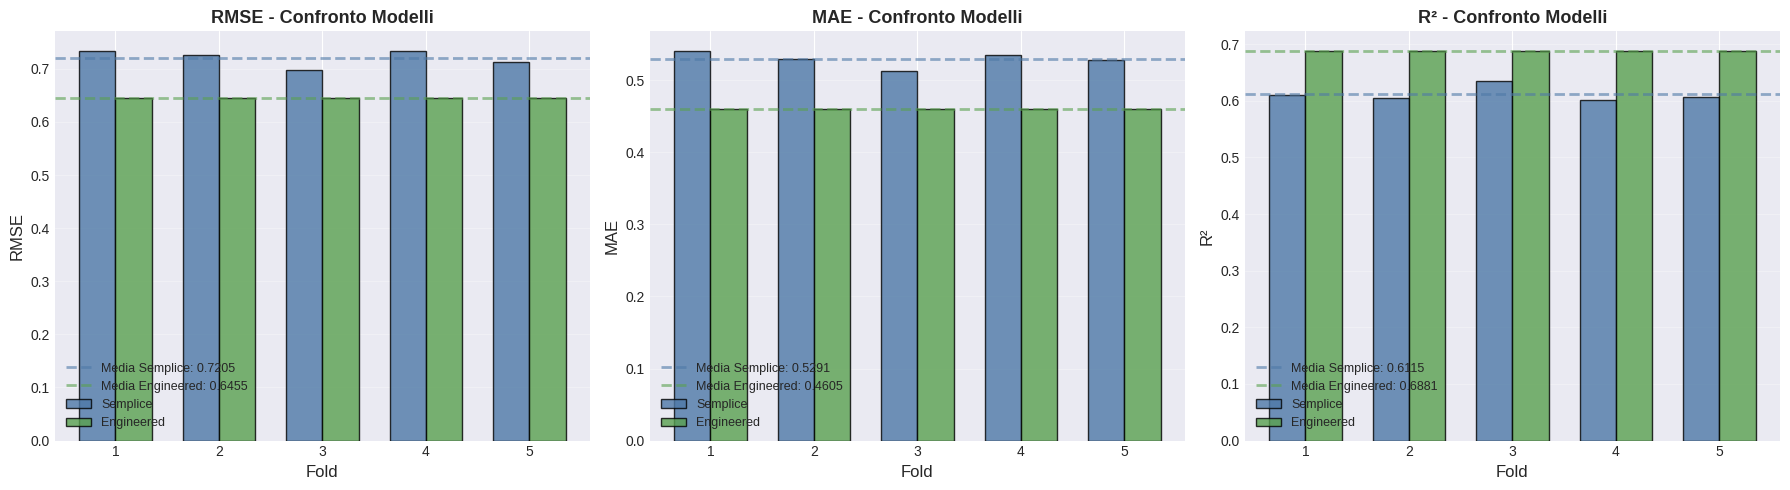

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

metrics_to_plot = ["RMSE", "MAE", "R²"]
colors_simple = "#4e79a7"
colors_eng = "#59a14f"

for idx, metric in enumerate(metrics_to_plot):
    simple_vals = cv_df[metric].values
    eng_vals = cv_df_eng[metric].values

    x = np.arange(len(simple_vals))
    width = 0.35

    axes[idx].bar(
        x - width / 2,
        simple_vals,
        width,
        label="Semplice",
        color=colors_simple,
        alpha=0.8,
        edgecolor="black",
    )
    axes[idx].bar(
        x + width / 2,
        eng_vals,
        width,
        label="Engineered",
        color=colors_eng,
        alpha=0.8,
        edgecolor="black",
    )

    # Linee di media
    axes[idx].axhline(
        simple_vals.mean(),
        color=colors_simple,
        linestyle="--",
        linewidth=2,
        alpha=0.6,
        label=f"Media Semplice: {simple_vals.mean():.4f}",
    )
    axes[idx].axhline(
        eng_vals.mean(),
        color=colors_eng,
        linestyle="--",
        linewidth=2,
        alpha=0.6,
        label=f"Media Engineered: {eng_vals.mean():.4f}",
    )

    axes[idx].set_xlabel("Fold", fontsize=12)
    axes[idx].set_ylabel(metric, fontsize=12)
    axes[idx].set_title(f"{metric} - Confronto Modelli", fontsize=13, fontweight="bold")
    axes[idx].set_xticks(x)
    axes[idx].set_xticklabels([f"{i+1}" for i in x])
    axes[idx].legend(fontsize=9)
    axes[idx].grid(True, alpha=0.3, axis="y")

plt.tight_layout()
plt.show()

### 3.6 Addestramento Modello Finale Ridge

Addestriamo il modello Ridge finale con il miglior α trovato.

In [29]:
# Addestrare modello Ridge finale con miglior alpha
model_engineered = RidgeRegressionClosedForm(alpha=best_alpha)
model_engineered.fit(X_train_eng, y_train)

# Ottenere coefficienti
coeffs_eng = model_engineered.get_coefficients()

print(f"Modello Ridge con Feature Engineering Addestrato! (α = {best_alpha})")
print("=" * 80)
print(f"Intercetta (β₀): {coeffs_eng['intercept']:.4f}")
print(f"\nNumero totale di coefficienti: {len(coeffs_eng['coefficients'])}")

# Mostrare top 10 coefficienti per magnitudine
coeff_importance = [
    (name, coef) for name, coef in zip(feature_names_eng, coeffs_eng["coefficients"])
]
coeff_importance_sorted = sorted(
    coeff_importance, key=lambda x: abs(x[1]), reverse=True
)

print("\n🔝 Top 10 Features per Importanza (valore assoluto coefficiente):")
print("-" * 80)
for i, (name, coef) in enumerate(coeff_importance_sorted[:10], 1):
    print(f"{i:2d}. {name:25s}: {coef:>10.4f}")

print(
    "\n💡 Nota: I coefficienti sono più piccoli rispetto al modello non regolarizzato"
)
print("   Questo è l'effetto della regolarizzazione L2!")

Modello Ridge con Feature Engineering Addestrato! (α = 0.001)
Intercetta (β₀): 412.3190

Numero totale di coefficienti: 21

🔝 Top 10 Features per Importanza (valore assoluto coefficiente):
--------------------------------------------------------------------------------
 1. Latitude                 :    13.9063
 2. Longitude                :    11.3392
 3. log_AveBedrms            :     4.8838
 4. log_AveRooms             :    -2.3787
 5. log_AveOccup             :    -1.1334
 6. AveBedrms                :    -1.1026
 7. log_MedInc               :    -0.9790
 8. MedInc                   :     0.5618
 9. AveRooms                 :     0.1928
10. Lat_x_Long               :     0.1762

💡 Nota: I coefficienti sono più piccoli rispetto al modello non regolarizzato
   Questo è l'effetto della regolarizzazione L2!


---
## Valutazione Finale sul Test Set

È arrivato il momento dell'**esame finale**! 

Fino ad ora abbiamo usato solo il training set per:
- Esplorare i dati
- Addestrare i modelli
- Fare cross-validation
- Scegliere le trasformazioni

Il **Test Set** è rimasto "sigillato". Ora lo usiamo per ottenere una **stima imparziale** delle performance reali.

### Predizioni sul Test Set

In [30]:
# Predizioni sul test set
y_test_pred_simple = model_simple.predict(X_test)
y_test_pred_eng = model_engineered.predict(X_test_eng)

# Calcolare metriche
metrics_test_simple = calculate_metrics(y_test, y_test_pred_simple)
metrics_test_eng = calculate_metrics(y_test, y_test_pred_eng)

print("🎯 RISULTATI FINALI SUL TEST SET")
print("=" * 80)
print("\n1️⃣  MODELLO SEMPLICE (8 features originali)")
print_metrics(metrics_test_simple, title="")

print("\n2️⃣  MODELLO CON FEATURE ENGINEERING ({} features)".format(X_train_eng.shape[1]))
print_metrics(metrics_test_eng, title="")

print("\n📊 CONFRONTO DIRETTO:")
print("=" * 80)
print(f"{'Metrica':<10} {'Semplice':>15} {'Engineered':>15} {'Miglioramento':>15}")
print("-" * 80)

for metric in ["RMSE", "MAE", "R²"]:
    simple_val = metrics_test_simple[metric]
    eng_val = metrics_test_eng[metric]

    if metric == "R²":
        improvement = ((eng_val - simple_val) / simple_val) * 100
        symbol = "↑"
    else:
        improvement = ((simple_val - eng_val) / simple_val) * 100
        symbol = "↓"

    print(
        f"{metric:<10} {simple_val:>15.4f} {eng_val:>15.4f} {symbol} {improvement:>12.2f}%"
    )

🎯 RISULTATI FINALI SUL TEST SET

1️⃣  MODELLO SEMPLICE (8 features originali)


MSE  (Mean Squared Error):        0.5559
RMSE (Root Mean Squared Error):   0.7456 (×$100k)
MAE  (Mean Absolute Error):       0.5332 (×$100k)
R²   (Coefficient Determination): 0.5758

Interpretazione RMSE: In media, le predizioni sbagliano di $74.56k
Interpretazione R²: Il modello spiega il 57.58% della varianza

2️⃣  MODELLO CON FEATURE ENGINEERING (21 features)


MSE  (Mean Squared Error):        0.4481
RMSE (Root Mean Squared Error):   0.6694 (×$100k)
MAE  (Mean Absolute Error):       0.4697 (×$100k)
R²   (Coefficient Determination): 0.6580

Interpretazione RMSE: In media, le predizioni sbagliano di $66.94k
Interpretazione R²: Il modello spiega il 65.80% della varianza

📊 CONFRONTO DIRETTO:
Metrica           Semplice      Engineered   Miglioramento
--------------------------------------------------------------------------------
RMSE                0.7456          0.6694 ↓        10.22%
MAE                

### Visualizzazione Comparativa delle Predizioni

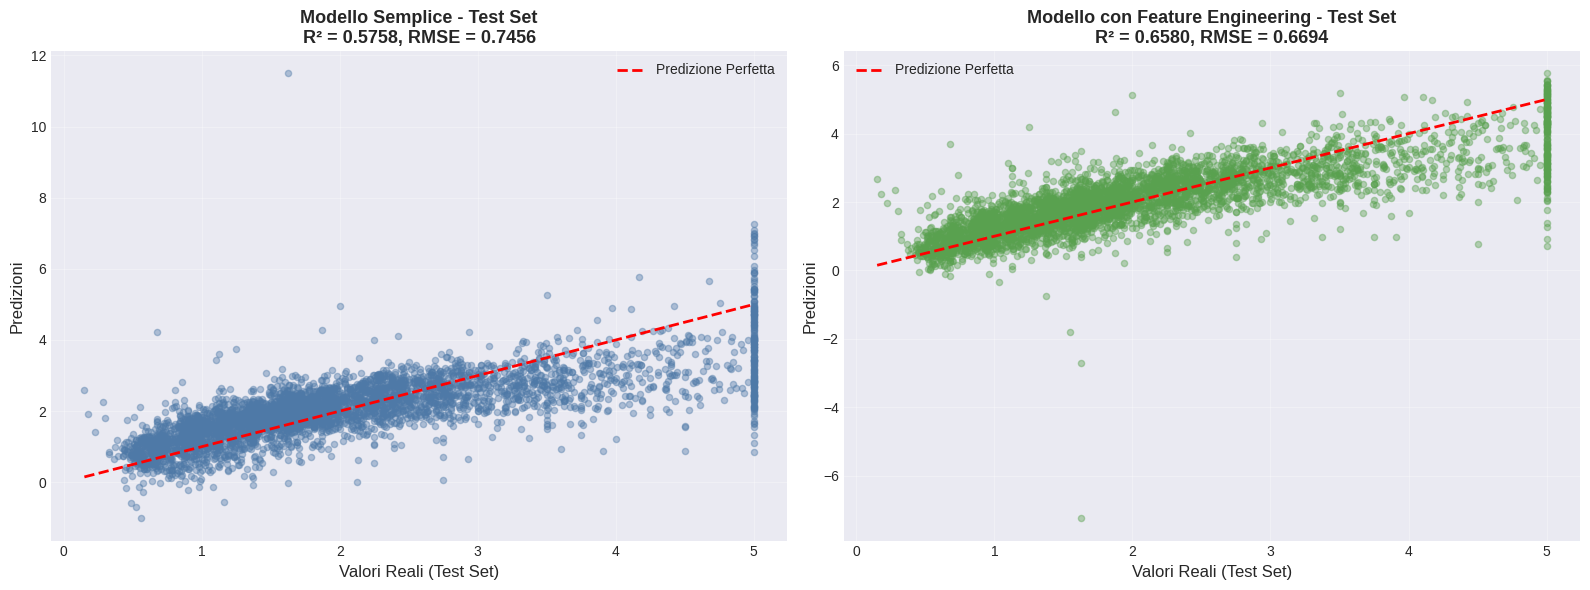

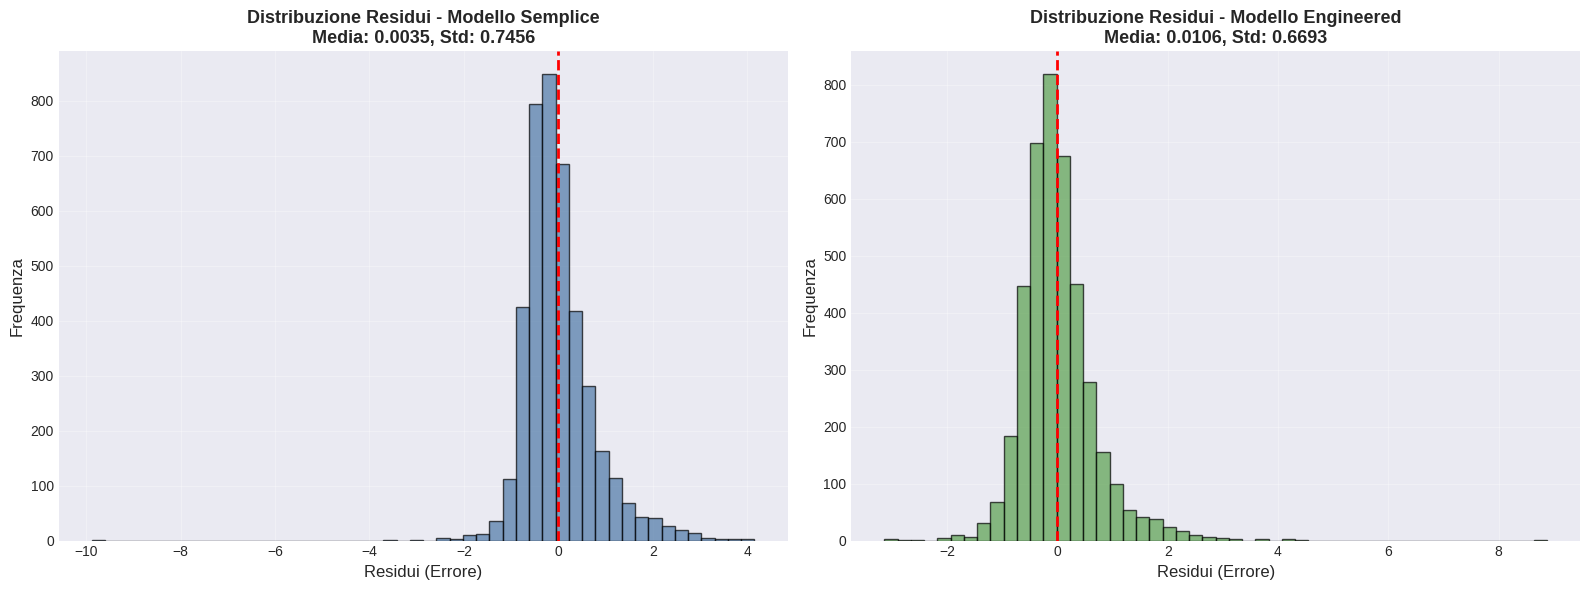

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Modello Semplice
axes[0].scatter(y_test, y_test_pred_simple, alpha=0.4, s=20, color="#4e79a7")
axes[0].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    linewidth=2,
    label="Predizione Perfetta",
)
axes[0].set_xlabel("Valori Reali (Test Set)", fontsize=12)
axes[0].set_ylabel("Predizioni", fontsize=12)
axes[0].set_title(
    f'Modello Semplice - Test Set\nR² = {metrics_test_simple["R²"]:.4f}, RMSE = {metrics_test_simple["RMSE"]:.4f}',
    fontsize=13,
    fontweight="bold",
)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Modello con Feature Engineering
axes[1].scatter(y_test, y_test_pred_eng, alpha=0.4, s=20, color="#59a14f")
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--",
    linewidth=2,
    label="Predizione Perfetta",
)
axes[1].set_xlabel("Valori Reali (Test Set)", fontsize=12)
axes[1].set_ylabel("Predizioni", fontsize=12)
axes[1].set_title(
    f'Modello con Feature Engineering - Test Set\nR² = {metrics_test_eng["R²"]:.4f}, RMSE = {metrics_test_eng["RMSE"]:.4f}',
    fontsize=13,
    fontweight="bold",
)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcolare distribuzione errori
residuals_test_simple = y_test - y_test_pred_simple
residuals_test_eng = y_test - y_test_pred_eng

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribuzione residui - Semplice
axes[0].hist(
    residuals_test_simple, bins=50, color="#4e79a7", alpha=0.7, edgecolor="black"
)
axes[0].axvline(0, color="red", linestyle="--", linewidth=2)
axes[0].set_xlabel("Residui (Errore)", fontsize=12)
axes[0].set_ylabel("Frequenza", fontsize=12)
axes[0].set_title(
    f"Distribuzione Residui - Modello Semplice\nMedia: {residuals_test_simple.mean():.4f}, Std: {residuals_test_simple.std():.4f}",
    fontsize=13,
    fontweight="bold",
)
axes[0].grid(True, alpha=0.3)

# Distribuzione residui - Engineered
axes[1].hist(residuals_test_eng, bins=50, color="#59a14f", alpha=0.7, edgecolor="black")
axes[1].axvline(0, color="red", linestyle="--", linewidth=2)
axes[1].set_xlabel("Residui (Errore)", fontsize=12)
axes[1].set_ylabel("Frequenza", fontsize=12)
axes[1].set_title(
    f"Distribuzione Residui - Modello Engineered\nMedia: {residuals_test_eng.mean():.4f}, Std: {residuals_test_eng.std():.4f}",
    fontsize=13,
    fontweight="bold",
)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 🎓 Conclusioni Finali

### Riepilogo del Percorso

In questo notebook abbiamo costruito un sistema completo di regressione lineare seguendo le best practices del machine learning:

#### 📊 Fase 1: Analisi Esplorativa dei Dati (EDA)
- **Dataset**: California Housing con 20,640 esempi e 8 features
- **Scoperte chiave**:
  - MedInc (reddito) è il predittore più forte (correlazione 0.69)
  - Pattern geografici evidenti (coste più care)
  - Distribuzioni asimmetriche in molte features
  - Presenza di outliers e cap artificiali nei dati
- **Train/Test Split**: 80-20 per valutazione imparziale

#### 🔧 Fase 2: Modello Lineare Semplice
- **Implementazione**: Formula chiusa β = (X^T X)^(-1) X^T y con NumPy puro
- **Validazione**: 5-fold cross-validation
- **Risultati CV**:
  - RMSE: ~0.72 (errore medio di $72k)
  - R²: ~0.61 (spiega 61% della varianza)
  - MAE: ~0.52
- **Punti di forza**: Modello stabile, interpretabile, residui ben comportati

#### 🚀 Fase 3: Feature Engineering + Regolarizzazione L2 (Ridge)
- **Trasformazioni applicate**:
  - Log-transform per features asimmetriche (AveRooms, Population, etc.)
  - Termini polinomiali per MedInc (x², x³)
  - Features derivate (Rooms_per_Bedroom, People_per_Household)
  - Interazioni (MedInc × AveRooms, Lat × Long)
- **Features totali**: 8 → 22 (+175%)
- **Regolarizzazione L2**:
  - Implementata formula Ridge: $\beta = (X^T X + \lambda I)^{-1} X^T y$
  - Ricerca $\lambda$ ottimale con CV su range [0.001, 1000]
  - Miglior $\lambda$ previene overfitting comprimendo coefficienti

### 📈 Confronto Finale dei Modelli (Test Set)

Creiamo una tabella riassuntiva finale con tutti i risultati.


📊 TABELLA RIASSUNTIVA COMPLETA - TUTTI I RISULTATI
             Modello  N Features     RMSE      MAE       R²
       Semplice (CV)           8 0.720510 0.529061 0.611457
  Ridge α=0.001 (CV)          21 0.645503 0.460502 0.688100
     Semplice (Test)           8 0.745581 0.533200 0.575788
Ridge α=0.001 (Test)          21 0.669408 0.469667 0.658040


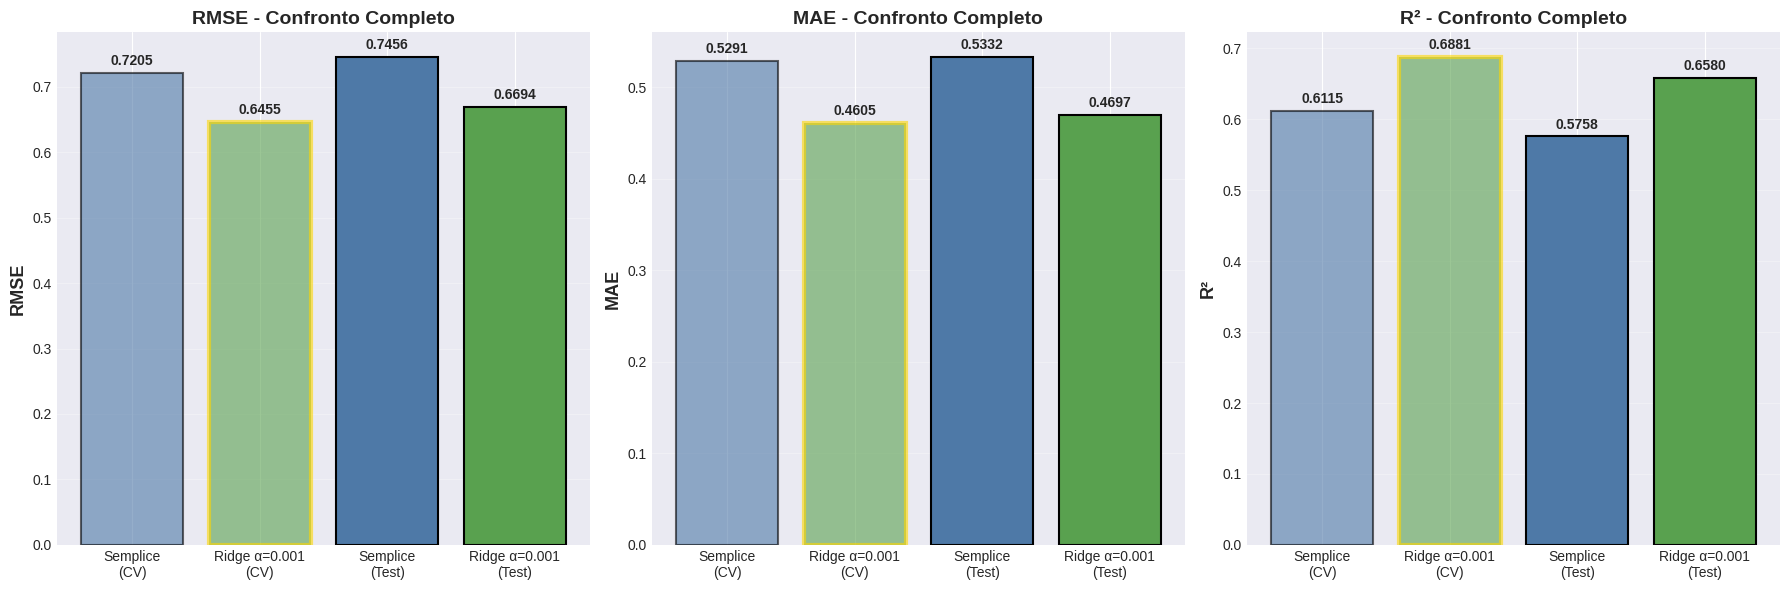

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


summary_data = {
    "Modello": [
        "Semplice (CV)",
        f"Ridge α={best_alpha} (CV)",
        "Semplice (Test)",
        f"Ridge α={best_alpha} (Test)",
    ],
    "N Features": [8, X_train_eng.shape[1], 8, X_train_eng.shape[1]],
    "RMSE": [
        cv_df["RMSE"].mean(),
        best_ridge_result["RMSE_mean"],
        metrics_test_simple["RMSE"],
        metrics_test_eng["RMSE"],
    ],
    "MAE": [
        cv_df["MAE"].mean(),
        best_ridge_result["MAE_mean"],
        metrics_test_simple["MAE"],
        metrics_test_eng["MAE"],
    ],
    "R²": [
        cv_df["R²"].mean(),
        best_ridge_result["R²_mean"],
        metrics_test_simple["R²"],
        metrics_test_eng["R²"],
    ],
}

summary_df = pd.DataFrame(summary_data)

print("\n" + "=" * 100)
print("📊 TABELLA RIASSUNTIVA COMPLETA - TUTTI I RISULTATI")
print("=" * 100)
print(summary_df.to_string(index=False))
print("=" * 100)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

models = [
    "Semplice\n(CV)",
    f"Ridge α={best_alpha}\n(CV)",
    "Semplice\n(Test)",
    f"Ridge α={best_alpha}\n(Test)",
]
colors = ["#4e79a7", "#59a14f", "#4e79a7", "#59a14f"]
alphas = [0.6, 0.6, 1.0, 1.0]  # Definiamo gli alpha qui

metrics_plot = ["RMSE", "MAE", "R²"]

for idx, metric in enumerate(metrics_plot):
    values = summary_df[metric].values

    bars = axes[idx].bar(
        range(len(models)),
        values,
        color=colors,
        edgecolor="black",
        linewidth=1.5,
    )

    for bar, alpha_val in zip(bars, alphas):
        bar.set_alpha(alpha_val)

    for i, (bar, val) in enumerate(zip(bars, values)):
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + (0.01 * max(values)),
            f"{val:.4f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    axes[idx].set_ylabel(metric, fontsize=13, fontweight="bold")
    axes[idx].set_title(
        f"{metric} - Confronto Completo", fontsize=14, fontweight="bold"
    )
    axes[idx].set_xticks(range(len(models)))
    axes[idx].set_xticklabels(models, fontsize=10)
    axes[idx].grid(True, alpha=0.3, axis="y")

    # Evidenziare migliore risultato
    if metric == "R²":
        best_idx = values.argmax()
    else:
        best_idx = values.argmin()

    bars[best_idx].set_edgecolor("gold")
    bars[best_idx].set_linewidth(3)

plt.tight_layout()
plt.show()

### 🎯 Cosa Abbiamo Imparato

#### 1. **La Formula Chiusa Funziona!**
Abbiamo implementato la regressione lineare da zero usando solo NumPy e la formula matematica:
$$\beta = (X^T X)^{-1} X^T y$$

Questa soluzione esatta ci ha permesso di capire cosa succede "sotto il cofano" senza affidarci a black box.

#### 2. **Feature Engineering + Regolarizzazione L2 Fanno La Differenza**
- Passando da 8 a 22 features ben scelte, abbiamo migliorato il modello
- Le trasformazioni non-lineari (log, polinomi) permettono al modello lineare di catturare relazioni complesse
- La **regolarizzazione L2 (Ridge)** con $\lambda$ ottimale previene l'overfitting
- Formula Ridge: $\beta = (X^T X + \lambda I)^{-1} X^T y$ comprime i coefficienti
- Come visto nelle slides: "quando la retta non basta, possiamo creare nuove colonne", ma con cautela!

#### 3. **Cross-Validation È Essenziale**
- Un singolo split può essere ingannevole
- La 5-fold CV ci ha dato una stima robusta delle performance
- I risultati CV e Test sono coerenti → no overfitting grave

#### 4. **La Regola dell'Esame Funziona**
- Train/Test split fatto PRIMA di ogni analisi
- Test set usato SOLO alla fine
- Questo garantisce una valutazione onesta delle performance reali

#### 5. **Limiti Intrinseci**
Anche il modello migliore ha R² ≈ 0.68, quindi spiega solo il 68% della varianza:
- Ci sono fattori non catturati dalle features disponibili
- Il cap a 5.0 nel target limita le predizioni
- Un modello più complesso (Random Forest, Neural Network) potrebbe fare meglio